In [1]:
import socceraction
from socceraction.data.statsbomb import StatsBombLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from mplsoccer import Pitch, Sbopen, VerticalPitch
import socceraction.spadl as spadl

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set up the StatsBomb data loader
SBL = StatsBombLoader()

# View all available competitions
df_competitions = SBL.competitions()

In [3]:
# get all the seasons in the dataset for the FA Women's Super League, which the target competion
competition_seasons = df_competitions[df_competitions['competition_name'] == "FA Women's Super League"]
competition_seasons

,season_id,competition_id,competition_name,country_name,competition_gender,season_name
15,90,37,FA Women's Super League,England,female,2020/2021
16,42,37,FA Women's Super League,England,female,2019/2020
17,4,37,FA Women's Super League,England,female,2018/2019


In [4]:
# Create a dataframe with all games from FA Women's Super League 2020/2021 season as our model test dataset

# Create a dataframe with all the games in the previous 2 seasons as our train and validation set

df_games_season_4 = SBL.games(competition_id=37, season_id=4).set_index("game_id")
df_games_season_42 = SBL.games(competition_id=37, season_id=42).set_index("game_id")
df_games = pd.concat([df_games_season_4, df_games_season_42], axis=0)
df_games_test = SBL.games(competition_id=37, season_id=90).set_index("game_id")


In [5]:
df_games.shape

(195, 11)

In [6]:
df_games.head()

,season_id,competition_id,competition_stage,game_day,game_date,home_team_id,away_team_id,home_score,away_score,venue,referee
game_id,,,,,,,,,,,
7298,4,37,Regular Season,0,2018-02-24 20:45:00,746,971,2,2,Academy Stadium,Darren England
19778,4,37,Regular Season,12,2018-12-09 13:15:00,746,969,1,0,Academy Stadium,Rebecca Welch
19771,4,37,Regular Season,11,2018-12-02 15:00:00,969,970,2,1,\tARMCO Arena,Jane Simms
19736,4,37,Regular Season,5,2018-10-14 15:00:00,971,968,0,5,Kingsmeadow,Sam Purkiss
19745,4,37,Regular Season,7,2018-10-28 15:00:00,965,970,2,1,Broadfield Stadium,Jacob Miles


We have 195 games with 11 attributes each. 

### Explore a single game

In [7]:
# for the chose match_id, get the teams involved, players and events

game_id = 7298
df_teams = SBL.teams(game_id)
df_players = SBL.players(game_id)
df_events = SBL.events(game_id)

In [8]:
df_teams.head()

,team_id,team_name
0,971,Chelsea FCW
1,746,Manchester City WFC


In [9]:
df_players.head()

,game_id,team_id,player_id,player_name,nickname,jersey_number,is_starter,starting_position_id,starting_position_name,minutes_played
0,7298,971,4633,Magdalena Lilly Eriksson,None,16,True,5,Left Center Back,97
1,7298,971,4636,Maria Thorisdottir,None,2,False,0,Substitute,12
2,7298,971,4638,Drew Spence,None,24,True,15,Left Center Midfield,58
3,7298,971,4640,Rut Hedvig Lindahl,Hedvig Lindahl,1,True,1,Goalkeeper,97
4,7298,971,4641,Francesca Kirby,None,14,True,22,Right Center Forward,85


In [10]:
df_events.head()

,game_id,event_id,period_id,team_id,player_id,type_id,type_name,index,timestamp,minute,...,team_name,duration,extra,related_events,player_name,position_id,position_name,location,under_pressure,counterpress
0,7298,0b483cd2-1d36-49a0-85c2-149a9de553df,1,746,NaN,35,Starting XI,1,1900-01-01 00:00:00.000,0,...,Manchester City WFC,0.00,"{'tactics': {'formation': 433, 'lineup': [{'pl...",[],NaN,NaN,NaN,NaN,False,False
1,7298,2c873afb-73bb-48a1-9fd5-bfe1400b4a83,1,971,NaN,35,Starting XI,2,1900-01-01 00:00:00.000,0,...,Chelsea FCW,0.00,"{'tactics': {'formation': 352, 'lineup': [{'pl...",[],NaN,NaN,NaN,NaN,False,False
2,7298,040940a1-5972-431e-b6ac-e723edd8e7c2,1,746,NaN,18,Half Start,3,1900-01-01 00:00:00.000,0,...,Manchester City WFC,7.96,{},[5ba286bd-c397-4ac4-b12f-6bace943afce],NaN,NaN,NaN,NaN,False,False
3,7298,5ba286bd-c397-4ac4-b12f-6bace943afce,1,971,NaN,18,Half Start,4,1900-01-01 00:00:00.000,0,...,Chelsea FCW,8.16,{},[040940a1-5972-431e-b6ac-e723edd8e7c2],NaN,NaN,NaN,NaN,False,False
4,7298,2a456ec2-352c-499b-b5cc-e68bf84c7e9a,1,971,4647.0,30,Pass,5,1900-01-01 00:00:00.100,0,...,Chelsea FCW,0.00,"{'pass': {'recipient': {'id': 4659, 'name': 'R...",[483b7286-e75e-4191-80be-ac93bfed1473],So-Yun Ji,14.0,Center Midfield,"[61.0, 40.0]",False,False


In [11]:
home_team_id = df_games.at[game_id, "home_team_id"]
df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id=home_team_id)

In [12]:
df_actions.head()

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id
0,7298,2a456ec2-352c-499b-b5cc-e68bf84c7e9a,1,0.0,971,4647.0,52.058824,33.569620,50.294118,30.987342,0,1,0,0
1,7298,7e908bd8-8e2f-44f8-9cc6-0435cd9ed3ed,1,0.0,971,4659.0,50.294118,30.987342,45.000000,27.544304,21,1,0,1
2,7298,38023613-6b26-44e2-a0f8-9aab9960d2ff,1,0.0,971,4659.0,45.000000,27.544304,31.764706,3.443038,0,1,0,2
3,7298,0d016edd-87cf-4e77-80fa-4504f367db00,1,2.0,971,5088.0,31.764706,3.443038,10.588235,7.746835,21,1,0,3
4,7298,ccb57323-17d3-43db-8ae4-0d170c59c9cb,1,6.0,971,5088.0,10.588235,7.746835,10.588235,7.746835,19,0,0,4


In [13]:
df_actions = spadl.add_names(df_actions)
df_actions.head()

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id,type_name,result_name,bodypart_name
0,7298,2a456ec2-352c-499b-b5cc-e68bf84c7e9a,1,0.0,971,4647.0,52.058824,33.569620,50.294118,30.987342,0,1,0,0,pass,success,foot
1,7298,7e908bd8-8e2f-44f8-9cc6-0435cd9ed3ed,1,0.0,971,4659.0,50.294118,30.987342,45.000000,27.544304,21,1,0,1,dribble,success,foot
2,7298,38023613-6b26-44e2-a0f8-9aab9960d2ff,1,0.0,971,4659.0,45.000000,27.544304,31.764706,3.443038,0,1,0,2,pass,success,foot
3,7298,0d016edd-87cf-4e77-80fa-4504f367db00,1,2.0,971,5088.0,31.764706,3.443038,10.588235,7.746835,21,1,0,3,dribble,success,foot
4,7298,ccb57323-17d3-43db-8ae4-0d170c59c9cb,1,6.0,971,5088.0,10.588235,7.746835,10.588235,7.746835,19,0,0,4,bad_touch,fail,foot


In [14]:
# Find a goal to visualise later

df_actions[(df_actions['type_name']=='shot') & (df_actions['result_name']=='success')]

# goals at index 138, 523, 1199, 1977


,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id,type_name,result_name,bodypart_name
138,7298,3f0fc8e9-a09f-480a-9396-132e1ca05ec5,1,346.0,971,4642.0,10.588235,26.683544,0.0,36.324051,11,1,0,138,shot,success,foot
523,7298,13933d30-56e3-4900-b942-0ee01af8ed1f,1,1401.0,971,4647.0,10.588235,30.126582,0.0,36.668354,11,1,0,523,shot,success,foot
1199,7298,3279e6e0-c796-4871-aaaa-75344dc903b8,2,221.0,746,4654.0,100.588235,33.569620,105.0,33.827848,11,1,1,1199,shot,success,head
1977,7298,12092a46-bc36-4f00-91f6-767ef8601ae1,2,2434.0,746,4643.0,85.588235,29.265823,105.0,31.159494,11,1,0,1977,shot,success,foot


In [15]:
df_actions = spadl.play_left_to_right(df_actions, home_team_id=home_team_id)

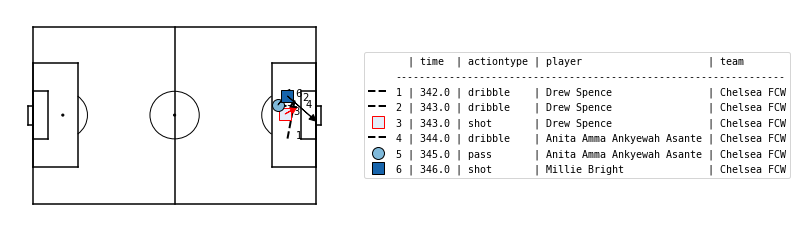

In [16]:
import matplotsoccer as mps

# Select relevant actions
df_actions_goal = df_actions.loc[138 - 5: 138]
# Replace result, actiontype and bodypart IDs by their corresponding name
df_actions_goal = spadl.add_names(df_actions_goal)
# Add team and player names
df_actions_goal = df_actions_goal.merge(df_teams).merge(df_players)
# Create the plot
mps.actions(
    location=df_actions_goal[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_actions_goal.type_name,
    team=df_actions_goal.team_name,
    result=df_actions_goal.result_name == "success",
    label=df_actions_goal[["time_seconds", "type_name", "player_name", "team_name"]],
    labeltitle=["time", "actiontype", "player", "team"],
    zoom=False
)

In [17]:
import socceraction.xthreat as xthreat
import socceraction.spadl as spadl

# 1. Load a set of actions to train the model on
actions = df_actions

# 2. Train xT model
xTModel = xthreat.ExpectedThreat(l=16, w=12)
xTModel.fit(actions)

# 3. Rate ball-progressing actions
# xT should only be used to value actions that move the ball
# and that keep the current team in possession of the ball
mov_actions = xthreat.get_successful_move_actions(actions)
mov_actions["xT_value"] = xTModel.predict(mov_actions)

# iterations:  45


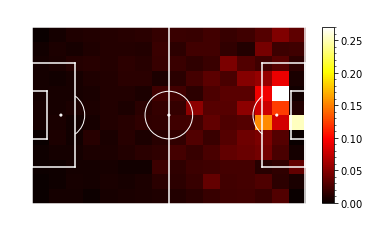

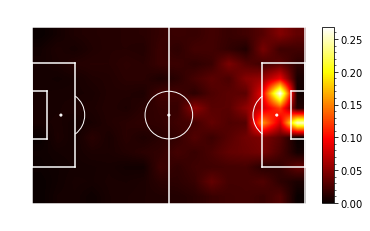

<AxesSubplot:>

In [18]:
# Inspect the learned heatmap
mps.heatmap(xTModel.xT, cmap="hot", linecolor="white", cbar="True")

# Inspect the interpolated heatmap used for predictions
interp = xTModel.interpolator()
x = np.linspace(0, 105, 1050)
y = np.linspace(0, 68, 680)
mps.heatmap(interp(x,y), cmap="hot", linecolor="white", cbar="True")

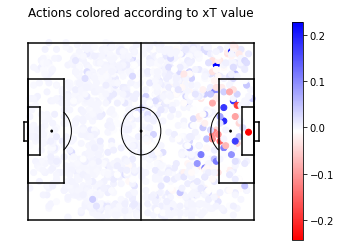

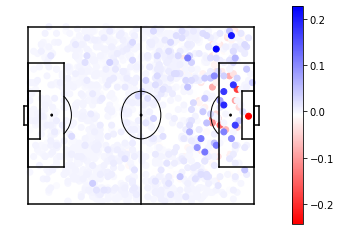

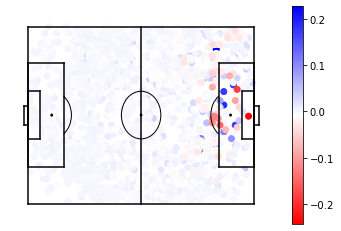

In [19]:
import matplotlib.pyplot as plt

## Visualize xT predictions 
a = mov_actions

# Show scatterplot of actions colored according to xT value
mps.field(show=False)
plt.title("Actions colored according to xT value")
plt.scatter(a.start_x, a.start_y, c=a.xT_value, cmap="bwr_r")
plt.colorbar()
plt.show()

# Show actions with low xT Values on top
a = a.sort_values("xT_value", ascending=True)
mps.field(show=False)
plt.scatter(a.start_x, a.start_y, c=a.xT_value, cmap="bwr_r")
plt.colorbar()
plt.show()

# Show actions with high xT Values on top
a = a.sort_values("xT_value", ascending=False)
mps.field(show=False)
plt.scatter(a.start_x, a.start_y, c=a.xT_value, cmap="bwr_r")
plt.colorbar()
plt.show()

## Convert training dataset to SPADL Schema and compute VAEP Score for all actions

In [21]:
from socceraction.vaep import VAEP
from tqdm import tqdm

VAEP_model = VAEP(nb_prev_actions=5)

# compute features and labels for each game
all_features, all_labels, all_actions = [], [], []
for game_id, game in tqdm(list(df_games.iterrows())):
    
    # load the game's events
    game_events = SBL.events(game_id)
    
    # convert the events to actions
    game_home_team_id = df_games.at[game_id, "home_team_id"]
    game_actions = spadl.statsbomb.convert_to_actions(game_events, game_home_team_id)
    game_actions = socceraction.spadl.add_names(game_actions)
    
    # compute features and labels
    all_actions.append(game_actions)
    all_features.append(VAEP_model.compute_features(game, game_actions))
    all_labels.append(VAEP_model.compute_labels(game, game_actions))

# combine all features and labels in a single dataframe
all_actions = pd.concat(all_actions)
all_features = pd.concat(all_features)
all_labels = pd.concat(all_labels)

# fit the model
VAEP_model.fit(all_features, all_labels)

100%|██████████| 195/195 [09:46<00:00,  3.01s/it] 


[0]	validation_0-auc:0.77428
[1]	validation_0-auc:0.77558
[2]	validation_0-auc:0.77559
[3]	validation_0-auc:0.77559
[4]	validation_0-auc:0.79749
[5]	validation_0-auc:0.80232
[6]	validation_0-auc:0.80241
[7]	validation_0-auc:0.80504
[8]	validation_0-auc:0.81032
[9]	validation_0-auc:0.81154
[10]	validation_0-auc:0.81185
[11]	validation_0-auc:0.81134
[12]	validation_0-auc:0.81302
[13]	validation_0-auc:0.81527
[14]	validation_0-auc:0.81672
[15]	validation_0-auc:0.81632
[16]	validation_0-auc:0.81764
[17]	validation_0-auc:0.81999
[18]	validation_0-auc:0.82047
[19]	validation_0-auc:0.82234
[20]	validation_0-auc:0.82282
[21]	validation_0-auc:0.82454
[22]	validation_0-auc:0.82637
[23]	validation_0-auc:0.82778
[24]	validation_0-auc:0.83071
[25]	validation_0-auc:0.83105
[26]	validation_0-auc:0.83136
[27]	validation_0-auc:0.83077
[28]	validation_0-auc:0.83415
[29]	validation_0-auc:0.83441
[30]	validation_0-auc:0.83507
[31]	validation_0-auc:0.83663
[32]	validation_0-auc:0.83681
[33]	validation_0-au

In [22]:
VAEP_ratings = []
for game_id, game in tqdm(list(df_games.iterrows())):
    df_events = SBL.events(game_id)
    home_team_id = df_games.at[game_id, "home_team_id"]
    df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id)
    ratings = VAEP_model.rate(df_games.loc[game_id], df_actions)
    VAEP_ratings.append(ratings)

100%|██████████| 195/195 [10:02<00:00,  3.09s/it]


In [24]:
VAEP_ratings = pd.concat(VAEP_ratings)
rated_df = pd.concat([all_actions, VAEP_ratings], axis=1)

## Compute xT for each action

In [26]:
# 1. Convert direction of play
actions_ltr = pd.concat([
  spadl.play_left_to_right(all_actions[all_actions['game_id'] == game_id], game.home_team_id)
  for game_id, game in df_games.iterrows()
])

actions_ltr = socceraction.spadl.add_names(actions_ltr)
actions_ltr['original_index']=actions_ltr.index

# 3. Train xT model
xTModel = xthreat.ExpectedThreat(l=16, w=12)
xTModel.fit(actions_ltr)

# 4. Rate ball-progressing actions
# xT should only be used to value actions that move the ball
# and that keep the current team in possession of the ball
mov_actions = xthreat.get_successful_move_actions(actions_ltr)
mov_actions["xT_value"] = xTModel.predict(mov_actions)

# iterations:  38


In [27]:
print(f'rated_df shape: {rated_df.shape}')
print(f'move_actions shape: {mov_actions.shape}')

rated_df shape: (375518, 20)
move_actions shape: (267218, 19)


## Creating new Features

### Features to add in

**Notebooks:**

- Single match exploration and variables/data discovery
- Data prep across seasons - build main dataset and split into test/validate/test
- Statistical testing inputs against targets
- Clustering player targets, predicting next actions, validating and testing 
- Predicting transfers


**Input Features:**

- 'game_id' - maybe (might need it to generate features, but drop before feeding model)
- 'original_event_id' - maybe
- 'period_id' 
- 'time_seconds' - maybe
- 'team_id',   
- 'player_id', 
- 'start_x', 
- 'start_y', 


These would not feed into the model, as they wouldnt be known yet for the line I am running prediction on - they should be represented in the n-x columns only as part of the previous moves. 

```
- 'end_x', 
- 'end_y',
- 'type_id',
- 'result_id', 
- 'bodypart_id', 
- 'action_id', 
- 'type_name', 
- 'result_name',
- 'bodypart_name', 
```


**To add:**
- Distance X
- Distance Y 
- 'start_pitch_zone'
- end_pitch_zone
- opponent
- home (how would this work when getting predictions? and when training)
- away

**For actions n-5:**
(if using a dataset with multiple matches, make sure they are from the same game)
- Prev_action_n-x_x_distance
- Prev_action_n-x_y_distance
- n-x_same_team
- n-x_same_player
- n-x_x_direction 
- n-x_y_direction
- n-x_action
- n-x_pitch_zone

**Target output:**

- Type of action 
- Next Zone

```some of these will need to be dummied```

**Football Scoring Metrics**
- xT per action 
- VAEP 
- aggregates at player level

Then swap the player ID for the player that we'd want to swap in to create a prediction dataset. 
(see if there is a transfer within the datast we could use as validation of the model)

- use the first 2 seasons for train and validate and the last season for test 
- predict the actions of players that had a transfer between season 2 and 3 - to test how the prediction does 

Each line of data should be standalone, rather than sequential - transforming sequential - time series type data - into non-sequential data

Then xT and VEAP output

In [28]:
rated_df.reset_index(drop=True, inplace=True)
rated_df.head()

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id,type_name,result_name,bodypart_name,offensive_value,defensive_value,vaep_value
0,7298,2a456ec2-352c-499b-b5cc-e68bf84c7e9a,1,0.0,971,4647.0,52.058824,33.569620,50.294118,30.987342,0,1,0,0,pass,success,foot,0.000000,-0.000000,0.000000
1,7298,7e908bd8-8e2f-44f8-9cc6-0435cd9ed3ed,1,0.0,971,4659.0,50.294118,30.987342,45.000000,27.544304,21,1,0,1,dribble,success,foot,0.000674,-0.000035,0.000639
2,7298,38023613-6b26-44e2-a0f8-9aab9960d2ff,1,0.0,971,4659.0,45.000000,27.544304,31.764706,3.443038,0,1,0,2,pass,success,foot,0.000000,0.000356,0.000356
3,7298,0d016edd-87cf-4e77-80fa-4504f367db00,1,2.0,971,5088.0,31.764706,3.443038,10.588235,7.746835,21,1,0,3,dribble,success,foot,0.004595,-0.000123,0.004472
4,7298,ccb57323-17d3-43db-8ae4-0d170c59c9cb,1,6.0,971,5088.0,10.588235,7.746835,10.588235,7.746835,19,0,0,4,bad_touch,fail,foot,-0.004126,-0.000242,-0.004367


In [31]:
df_actions_zones = rated_df.copy()

matches = []
for game_id, game in df_games.iterrows():
    # # load the game's events
    # game_events = SBL.events(game_id)
    # convert play left to right
    game_home_team_id = df_games.at[game_id, "home_team_id"]
    matches.append(spadl.play_left_to_right(df_actions_zones[df_actions_zones['game_id'] == game_id], home_team_id=game_home_team_id))

df_actions_zones = pd.concat(matches)

In [32]:
players = []
for game_id, game in tqdm(list(df_games.iterrows())):
    
    # load the games players
    players.append(SBL.players(game_id))


players = pd.concat(players, ignore_index=True)

100%|██████████| 195/195 [03:05<00:00,  1.05it/s]


In [33]:
goal_keepers = players[players['starting_position_id'] == 1].drop_duplicates(subset='player_name')

In [34]:
goal_keepers = goal_keepers[['player_id', 'player_name']]

In [35]:
zones = []
end_zones = []

for i, row in df_actions_zones.iterrows():
    if ((row['start_x'] >=0) & (row['start_x'] < 35)) & ((row['start_y']>=0) & (row['start_y'] < 23)):
        zones.append('zone_1')
    elif ((row['start_x'] >=0) & (row['start_x'] < 35)) & ((row['start_y']>=23) & (row['start_y'] < 46)):
        zones.append('zone_2')
    elif ((row['start_x'] >=0) & (row['start_x'] < 35)) & ((row['start_y']>=46) & (row['start_y'] <= 69)):
        zones.append('zone_3')
    elif ((row['start_x'] >=35) & (row['start_x'] < 70)) & ((row['start_y']>=0) & (row['start_y'] < 23)):
        zones.append('zone_4')
    elif ((row['start_x'] >=35) & (row['start_x'] < 70)) & ((row['start_y']>=23) & (row['start_y'] < 46)):
        zones.append('zone_5')
    elif ((row['start_x'] >=35) & (row['start_x'] < 70)) & ((row['start_y']>=46) & (row['start_y'] <= 69)):
        zones.append('zone_6')
    elif ((row['start_x'] >=70) & (row['start_x'] <= 105)) & ((row['start_y']>=0) & (row['start_y'] < 23)):
        zones.append('zone_7')
    elif ((row['start_x'] >=70) & (row['start_x'] <= 105)) & ((row['start_y']>=23) & (row['start_y'] < 46)):
        zones.append('zone_8')
    elif ((row['start_x'] >=70) & (row['start_x'] <= 105)) & ((row['start_y']>=46) & (row['start_y'] <= 69)):
        zones.append('zone_9')
    else:
        zones.append('no_zone')

for i, row in df_actions_zones.iterrows():
    if ((row['end_x'] >=0) & (row['end_x'] < 35)) & ((row['end_y']>=0) & (row['end_y'] < 23)):
        end_zones.append('zone_1')
    elif ((row['end_x'] >=0) & (row['end_x'] < 35)) & ((row['end_y']>=23) & (row['end_y'] < 46)):
        end_zones.append('zone_2')
    elif ((row['end_x'] >=0) & (row['end_x'] < 35)) & ((row['end_y']>=46) & (row['end_y'] <= 69)):
        end_zones.append('zone_3')
    elif ((row['end_x'] >=35) & (row['end_x'] < 70)) & ((row['end_y']>=0) & (row['end_y'] < 23)):
        end_zones.append('zone_4')
    elif ((row['end_x'] >=35) & (row['end_x'] < 70)) & ((row['end_y']>=23) & (row['end_y'] < 46)):
        end_zones.append('zone_5')
    elif ((row['end_x'] >=35) & (row['end_x'] < 70)) & ((row['end_y']>=46) & (row['end_y'] <= 69)):
        end_zones.append('zone_6')
    elif ((row['end_x'] >=70) & (row['end_x'] <= 105)) & ((row['end_y']>=0) & (row['end_y'] < 23)):
        end_zones.append('zone_7')
    elif ((row['end_x'] >=70) & (row['end_x'] <= 105)) & ((row['end_y']>=23) & (row['end_y'] < 46)):
        end_zones.append('zone_8')
    elif ((row['end_x'] >=70) & (row['end_x'] <= 105)) & ((row['end_y']>=46) & (row['end_y'] <= 69)):
        end_zones.append('zone_9')
    else:
        end_zones.append('no_zone')

df_actions_zones['start_pitch_zone'] = zones
df_actions_zones['end_pitch_zone'] = end_zones


In [36]:
mov_actions_with_zones = mov_actions.copy()

In [37]:
zones = []
end_zones = []

for i, row in mov_actions_with_zones.iterrows():
    if ((row['start_x'] >=0) & (row['start_x'] < 35)) & ((row['start_y']>=0) & (row['start_y'] < 23)):
        zones.append('zone_1')
    elif ((row['start_x'] >=0) & (row['start_x'] < 35)) & ((row['start_y']>=23) & (row['start_y'] < 46)):
        zones.append('zone_2')
    elif ((row['start_x'] >=0) & (row['start_x'] < 35)) & ((row['start_y']>=46) & (row['start_y'] <= 69)):
        zones.append('zone_3')
    elif ((row['start_x'] >=35) & (row['start_x'] < 70)) & ((row['start_y']>=0) & (row['start_y'] < 23)):
        zones.append('zone_4')
    elif ((row['start_x'] >=35) & (row['start_x'] < 70)) & ((row['start_y']>=23) & (row['start_y'] < 46)):
        zones.append('zone_5')
    elif ((row['start_x'] >=35) & (row['start_x'] < 70)) & ((row['start_y']>=46) & (row['start_y'] <= 69)):
        zones.append('zone_6')
    elif ((row['start_x'] >=70) & (row['start_x'] <= 105)) & ((row['start_y']>=0) & (row['start_y'] < 23)):
        zones.append('zone_7')
    elif ((row['start_x'] >=70) & (row['start_x'] <= 105)) & ((row['start_y']>=23) & (row['start_y'] < 46)):
        zones.append('zone_8')
    elif ((row['start_x'] >=70) & (row['start_x'] <= 105)) & ((row['start_y']>=46) & (row['start_y'] <= 69)):
        zones.append('zone_9')
    else:
        zones.append('no_zone')

for i, row in mov_actions_with_zones.iterrows():
    if ((row['end_x'] >=0) & (row['end_x'] < 35)) & ((row['end_y']>=0) & (row['end_y'] < 23)):
        end_zones.append('zone_1')
    elif ((row['end_x'] >=0) & (row['end_x'] < 35)) & ((row['end_y']>=23) & (row['end_y'] < 46)):
        end_zones.append('zone_2')
    elif ((row['end_x'] >=0) & (row['end_x'] < 35)) & ((row['end_y']>=46) & (row['end_y'] <= 69)):
        end_zones.append('zone_3')
    elif ((row['end_x'] >=35) & (row['end_x'] < 70)) & ((row['end_y']>=0) & (row['end_y'] < 23)):
        end_zones.append('zone_4')
    elif ((row['end_x'] >=35) & (row['end_x'] < 70)) & ((row['end_y']>=23) & (row['end_y'] < 46)):
        end_zones.append('zone_5')
    elif ((row['end_x'] >=35) & (row['end_x'] < 70)) & ((row['end_y']>=46) & (row['end_y'] <= 69)):
        end_zones.append('zone_6')
    elif ((row['end_x'] >=70) & (row['end_x'] <= 105)) & ((row['end_y']>=0) & (row['end_y'] < 23)):
        end_zones.append('zone_7')
    elif ((row['end_x'] >=70) & (row['end_x'] <= 105)) & ((row['end_y']>=23) & (row['end_y'] < 46)):
        end_zones.append('zone_8')
    elif ((row['end_x'] >=70) & (row['end_x'] <= 105)) & ((row['end_y']>=46) & (row['end_y'] <= 69)):
        end_zones.append('zone_9')
    else:
        end_zones.append('no_zone')

mov_actions_with_zones['start_pitch_zone'] = zones
mov_actions_with_zones['end_pitch_zone'] = end_zones

In [38]:
# opposition 
matches = list(df_actions_zones['game_id'].unique())
match_teams = {match: list(df_actions_zones[df_actions_zones['game_id'] == match]['team_id'].unique()) for match in matches}

df_actions_zones['opponent_id'] = [match_teams[k][1] if match_teams[k][0] == row['team_id'] else match_teams[k][0] \
     for i, row in df_actions_zones.iterrows() \
        for k, v in match_teams.items() \
            if row['game_id'] == k]

# update action type to pass/dribble/other to deal with class imbalance
df_actions_zones['type_name_encoded'] = ['pass' if x =='pass' else\
     ('dribble' if x =='dribble' else 'other')\
         for x in df_actions_zones['type_name']]

# Home or Away
df_actions_zones['home'] = [1 if np.array(df_games[df_games.index == row['game_id']]['home_team_id'] == row['team_id'])[0] \
    else 0 for i, row in df_actions_zones.iterrows() \
        for match in matches if row['game_id'] == match]

# x and y distance traveled 
df_actions_zones['x_dif'] = (df_actions_zones['end_x'] - df_actions_zones['start_x'])
df_actions_zones['y_dif'] = (df_actions_zones['end_y'] - df_actions_zones['start_y'])

#prior moves
print('Starting prior moves block')
for n in range(1,6):
    df_actions_zones[f'n-{n}_x_distance'] = df_actions_zones.groupby('game_id').shift(n)[['x_dif']]
    df_actions_zones[f'n-{n}_y_distance'] = df_actions_zones.groupby('game_id').shift(n)[['y_dif']]
    df_actions_zones[f'n-{n}_same_team'] = df_actions_zones.team_id.eq(df_actions_zones.team_id.shift(n))
    df_actions_zones[f'n-{n}_same_player'] = df_actions_zones.player_id.eq(df_actions_zones.player_id.shift(n))
    df_actions_zones[f'n-{n}_x_fwd_direction'] = [1 if row['x_dif'] > 0 else 0 for i, row in df_actions_zones.groupby('game_id').shift(n).iterrows()]
    df_actions_zones[f'n-{n}_y_lft_right_direction'] = [1 if row['y_dif'] > 0 else 0 for i, row in df_actions_zones.groupby('game_id').shift(n).iterrows()]
    df_actions_zones[f'n-{n}_start_pitch_zone'] = df_actions_zones.groupby('game_id').shift(n)[['start_pitch_zone']]
    df_actions_zones[f'n-{n}_end_pitch_zone'] = df_actions_zones.groupby('game_id').shift(n)[['end_pitch_zone']]
    df_actions_zones[f'n-{n}_start_x'] = df_actions_zones.groupby('game_id').shift(n)[['start_x']]
    df_actions_zones[f'n-{n}_start_y'] = df_actions_zones.groupby('game_id').shift(n)[['start_y']]
    df_actions_zones[f'n-{n}_end_x'] = df_actions_zones.groupby('game_id').shift(n)[['end_x']]
    df_actions_zones[f'n-{n}_end_y'] = df_actions_zones.groupby('game_id').shift(n)[['end_y']]
    df_actions_zones[f'n-{n}_type_name'] = df_actions_zones.groupby('game_id').shift(n)[['type_name']]
    df_actions_zones[f'n-{n}_type_name_encoded'] = df_actions_zones.groupby('game_id').shift(n)[['type_name_encoded']]
    df_actions_zones[f'n-{n}_result_name'] = df_actions_zones.groupby('game_id').shift(n)[['result_name']]
    df_actions_zones[f'n-{n}_bodypart_name'] = df_actions_zones.groupby('game_id').shift(n)[['bodypart_name']]
    df_actions_zones[f'n-{n}_offensive_value'] = df_actions_zones.groupby('game_id').shift(n)[['offensive_value']]
    df_actions_zones[f'n-{n}_defensive_value'] = df_actions_zones.groupby('game_id').shift(n)[['defensive_value']]
    df_actions_zones[f'n-{n}_vaep_value'] = df_actions_zones.groupby('game_id').shift(n)[['vaep_value']]
    # df_actions_zones[f'n-{n}_type_id'] = df_actions_zones.groupby('game_id').shift(n)[['type_id']]
    # df_actions_zones[f'n-{n}_result_id'] = df_actions_zones.groupby('game_id').shift(n)[['result_id']]
    # df_actions_zones[f'n-{n}_bodypart_id'] = df_actions_zones.groupby('game_id').shift(n)[['bodypart_id']]

Starting prior moves block


TO DO:

0. add a notebook 1 with a single match exploration - this becomes notebook 2 
1. group by zones and add in xT & VAEP Scores 
2. Visualise those 
3. Find top players for each team by xT for their end locations 
4. Calculate the xT difference between the start and end location 
5. EDA into notebook 2 - add in 5 EDA sections
    - zone analysis
    - top players
    - heatmaps for passes/dribbles/crosses and end_zones 
    - distance analysis 

other:
- modify code to add in seasons 1,2 - create season 3 as a separate test dataset 
- find player transfers


## Data Analysis on Training Set

In [39]:
xt_zone_values = mov_actions_with_zones[['end_pitch_zone', 'xT_value']].groupby('end_pitch_zone').mean().reset_index()

In [40]:
vaep_zone_values = df_actions_zones[['end_pitch_zone', 'vaep_value']].groupby('end_pitch_zone').mean().reset_index()

In [41]:
zone_values = pd.concat([vaep_zone_values, xt_zone_values['xT_value']], axis=1)

In [42]:
action_vaep = df_actions_zones[['type_name', 'vaep_value']].groupby('type_name').mean().reset_index()

In [43]:
action_vaep['vaep_sum'] = df_actions_zones[['type_name', 'vaep_value']].groupby('type_name').sum().reset_index()['vaep_value']

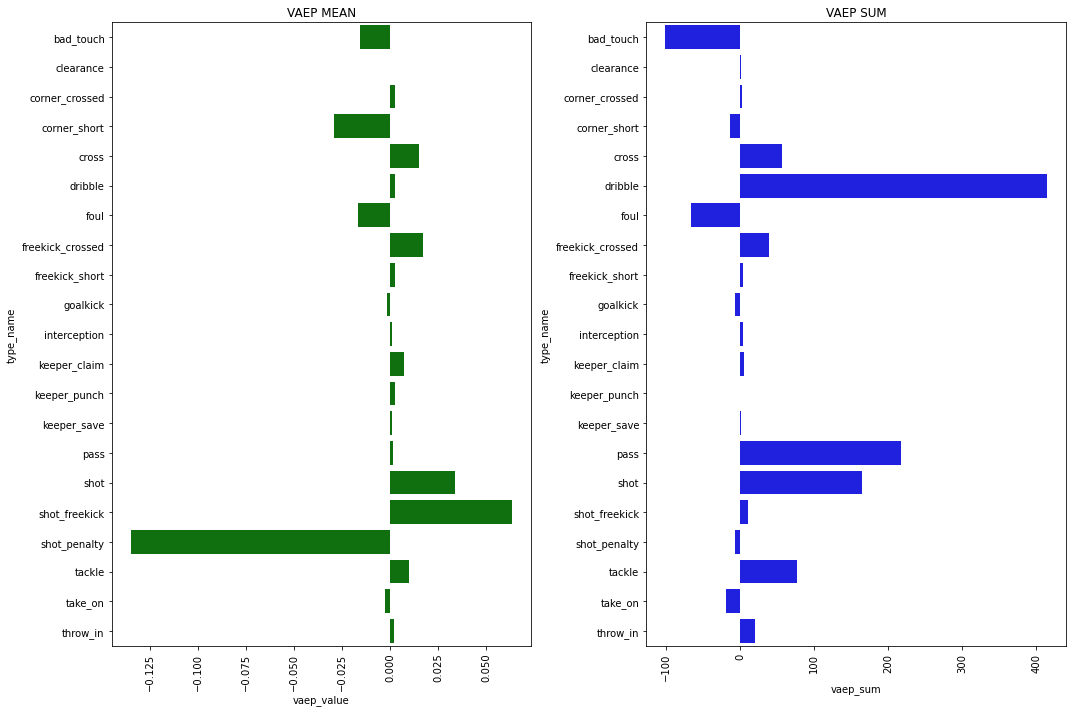

In [44]:
plt.subplots(2,1, figsize=(15,10))

plt.subplot(1,2,1)
sns.barplot(y=action_vaep['type_name'], x=action_vaep['vaep_value'], color='green')
plt.xticks(rotation='90')
plt.title('VAEP MEAN')


plt.subplot(1,2,2)
sns.barplot(y=action_vaep['type_name'], x=action_vaep['vaep_sum'], color='blue')
plt.xticks(rotation='90')
plt.title('VAEP SUM')


plt.tight_layout()
plt.show()

In [45]:
df_actions_zones[(df_actions_zones['type_name']=='shot') & (df_actions_zones['result_name']=='success')].head(10)

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,...,n-5_start_y,n-5_end_x,n-5_end_y,n-5_type_name,n-5_type_name_encoded,n-5_result_name,n-5_bodypart_name,n-5_offensive_value,n-5_defensive_value,n-5_vaep_value
138,7298,3f0fc8e9-a09f-480a-9396-132e1ca05ec5,1,346.0,971,4642.0,94.411765,41.316456,105.000000,31.675949,...,24.962025,97.058824,39.594937,dribble,dribble,success,foot,0.115623,0.000558,0.116181
523,7298,13933d30-56e3-4900-b942-0ee01af8ed1f,1,1401.0,971,4647.0,94.411765,37.873418,105.000000,31.331646,...,20.658228,82.941176,30.987342,pass,pass,success,foot,-0.053682,0.000729,-0.052954
1199,7298,3279e6e0-c796-4871-aaaa-75344dc903b8,2,221.0,746,4654.0,100.588235,33.569620,105.000000,33.827848,...,64.556962,60.000000,57.670886,pass,pass,success,foot,0.005786,0.000557,0.006343
1977,7298,12092a46-bc36-4f00-91f6-767ef8601ae1,2,2434.0,746,4643.0,85.588235,29.265823,105.000000,31.159494,...,32.708861,90.882353,19.797468,pass,pass,success,foot,0.018139,0.000866,0.019004
2458,19778,d78b5024-c498-48f3-8979-b72e575ac84b,1,709.0,746,4643.0,102.352941,43.037975,105.000000,30.987342,...,19.797468,3.529412,20.658228,dribble,dribble,success,foot,0.000723,-0.002090,-0.001368
5565,19771,f4d2311a-c176-4761-8e13-5cc626fb490f,2,291.0,969,15562.0,97.058824,42.177215,104.117647,31.331646,...,38.734177,55.588235,38.734177,dribble,dribble,success,foot,-0.000880,0.000062,-0.000818
6465,19771,efa573c6-1cca-4c51-8e46-f848fa1b5c72,2,2852.0,970,15716.0,98.823529,34.430380,105.000000,32.020253,...,20.658228,87.352941,18.075949,dribble,dribble,success,foot,0.006001,-0.000223,0.005778
7330,19736,f31721b3-2495-4f8b-aa4d-948889c5dfe7,1,2225.0,968,15623.0,90.882353,39.594937,104.117647,35.893671,...,41.316456,53.823529,50.784810,pass,pass,success,foot,0.006483,0.002408,0.008891
7601,19736,06aa93ad-015e-4cac-ae32-745276b4d5cf,2,389.0,968,10192.0,91.764706,9.468354,105.000000,37.701266,...,65.417722,37.941176,65.417722,tackle,other,success,foot,0.002292,0.016910,0.019202
7692,19736,e78e001b-34e4-49d4-bf41-ae8f83a13b95,2,695.0,968,15623.0,98.823529,37.012658,104.117647,30.987342,...,36.151899,100.588235,36.496203,shot,other,fail,foot,-0.411666,-0.000110,-0.411777


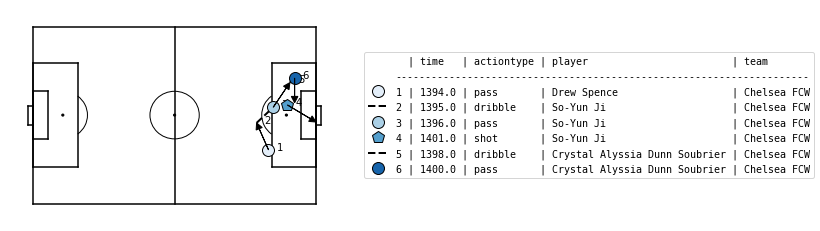

In [46]:
import matplotsoccer as mps

# Select relevant actions
df_actions_goal = df_actions_zones.loc[523 - 5: 523]
# # Replace result, actiontype and bodypart IDs by their corresponding name
# df_actions_goal = spadl.add_names(df_actions_goal)
# Add team and player names
df_actions_goal = df_actions_goal.merge(df_teams).merge(df_players)
# Create the plot
mps.actions(
    location=df_actions_goal[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_actions_goal.type_name,
    team=df_actions_goal.team_name,
    result=df_actions_goal.result_name == "success",
    label=df_actions_goal[["time_seconds", "type_name", "player_name", "team_name"]],
    labeltitle=["time", "actiontype", "player", "team"],
    zoom=False
)

#### Obserservations on VAEP and Action Type

- passes and dribbles have fairly small average scores - however, this is due to volume, when looking at the sum of those, we see greater contribution 
- here we get to see the high value of less frequent actions such as freekicks 

In [47]:
df_actions_zones.groupby('end_pitch_zone').describe()['x_dif'].reset_index()

,end_pitch_zone,count,mean,std,min,25%,50%,75%,max
0,zone_1,33741.0,1.177404,8.578404,-50.294118,-1.764706,0.000000,5.294118,34.411765
1,zone_2,40266.0,-1.158316,9.129341,-61.764706,-4.411765,0.000000,3.264706,32.647059
2,zone_3,35271.0,1.080875,8.505854,-51.176471,-1.764706,0.000000,5.294118,34.323529
3,zone_4,59776.0,5.739064,12.604037,-61.764706,0.000000,1.588235,10.411765,64.852941
4,zone_5,42529.0,4.183592,12.009782,-47.647059,-0.882353,0.882353,7.941176,67.058824
5,zone_6,57249.0,5.552102,12.394690,-43.235294,-0.352941,1.235294,10.411765,67.058824
6,zone_7,39257.0,8.618291,14.836832,-33.529412,0.000000,3.176471,13.235294,97.058824
7,zone_8,34039.0,8.116991,13.384676,-31.500000,0.000000,3.529412,13.235294,93.529412
8,zone_9,33390.0,8.699318,15.144503,-31.764706,0.000000,3.000000,14.117647,99.705882


In [48]:
zone_values = pd.concat([zone_values, df_actions_zones.groupby('end_pitch_zone').describe()['x_dif'].reset_index().drop(columns=['end_pitch_zone'])], axis=1)

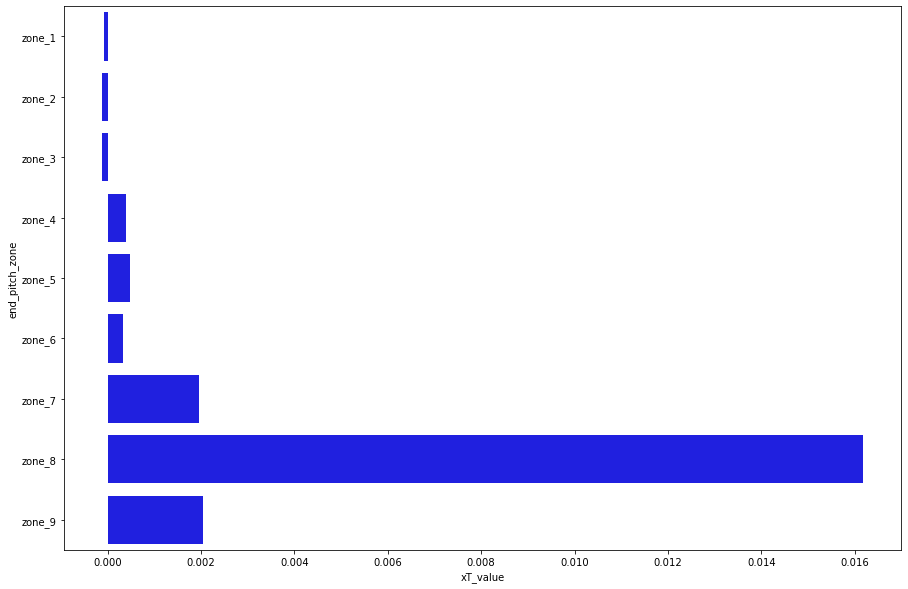

In [49]:
plt.figure(figsize=(15,10))
sns.barplot(y=zone_values['end_pitch_zone'], x=zone_values['xT_value'], color='blue')
plt.show()

#### Observations on xT Value and Pitch Zone

- Zone 8 has the largest mean xT score, which is to be expected as this is where the goal is and therefore it's likely to have more shots and goals from those positions 
- Zones 7 & 9 are the flanks around zone 8 therefore crosses and dangerous passes will come from and into those zones then leading to shots

In [50]:
player_end_zone_counts = df_actions_zones.groupby('player_id')[['end_pitch_zone', 'type_name', 'opponent_id','team_id', 'period_id']].value_counts().reset_index()

In [51]:
player_end_zone_counts.rename(columns={0:'count'}, inplace=True)

In [52]:
top_zone_players = player_end_zone_counts[(player_end_zone_counts['end_pitch_zone']=='zone_8')].sort_values(by='count', ascending=False)

In [53]:
top_vaep_players = list(df_actions_zones.groupby('player_id')['vaep_value'].sum().sort_values(ascending=False).reset_index()['player_id'])

In [54]:
df_actions_zones[(df_actions_zones['player_id'] == 4640) & (df_actions_zones['end_pitch_zone'] == 'zone_8')]

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,...,n-5_start_y,n-5_end_x,n-5_end_y,n-5_type_name,n-5_type_name_encoded,n-5_result_name,n-5_bodypart_name,n-5_offensive_value,n-5_defensive_value,n-5_vaep_value
43439,19785,3467ddfd-0355-4e38-99ab-f5682f5b4fd1,2,2009.0,971,4640.0,5.294118,6.025316,77.647059,37.012658,...,61.974684,91.764706,58.531646,pass,pass,fail,foot,-0.007421,-0.000572,-0.007993
102730,19720,d8bdc0a8-c53c-4bc5-a395-123469e9ad5b,2,2884.0,971,4640.0,45.000000,37.873418,75.882353,39.594937,...,34.430380,8.823529,42.177215,clearance,other,success,foot,-0.003148,-0.005564,-0.008712
114902,19714,8d421222-db9f-47cc-9810-78a77975637b,2,2512.0,971,4640.0,26.470588,40.455696,83.823529,42.177215,...,17.215190,60.000000,17.215190,dribble,dribble,success,foot,-0.001518,-0.000279,-0.001797
137048,19776,08c99a61-cff6-4452-b886-363ea784e465,2,759.0,971,4640.0,11.470588,32.708861,91.764706,36.151899,...,57.670886,38.823529,55.949367,dribble,dribble,success,foot,0.000236,-0.000223,0.000013


In [55]:
players[players.player_id.isin(top_vaep_players)].drop_duplicates(subset=['player_name']).head(10)

,game_id,team_id,player_id,player_name,nickname,jersey_number,is_starter,starting_position_id,starting_position_name,minutes_played
0,7298,971,4633,Magdalena Lilly Eriksson,None,16,True,5,Left Center Back,97
1,7298,971,4636,Maria Thorisdottir,None,2,False,0,Substitute,12
2,7298,971,4638,Drew Spence,None,24,True,15,Left Center Midfield,58
3,7298,971,4640,Rut Hedvig Lindahl,Hedvig Lindahl,1,True,1,Goalkeeper,97
4,7298,971,4641,Francesca Kirby,None,14,True,22,Right Center Forward,85
5,7298,971,4642,Millie Bright,None,4,True,3,Right Center Back,97
6,7298,971,4647,So-Yun Ji,Ji So-yun,10,True,14,Center Midfield,97
7,7298,971,4657,Anita Amma Ankyewah Asante,Anita Asante,6,True,4,Center Back,97
8,7298,971,4659,Ramona Bachmann,None,23,True,24,Left Center Forward,94
9,7298,971,4660,Erin Cuthbert,None,22,False,0,Substitute,39


In [56]:
players[players.player_id.isin(top_zone_players['player_id'])].drop_duplicates(subset=['player_name'])[['player_id', 'player_name', 'starting_position_name']].head(10)


,player_id,player_name,starting_position_name
0,4633,Magdalena Lilly Eriksson,Left Center Back
1,4636,Maria Thorisdottir,Substitute
2,4638,Drew Spence,Left Center Midfield
3,4640,Rut Hedvig Lindahl,Goalkeeper
4,4641,Francesca Kirby,Right Center Forward
5,4642,Millie Bright,Right Center Back
6,4647,So-Yun Ji,Center Midfield
7,4657,Anita Amma Ankyewah Asante,Center Back
8,4659,Ramona Bachmann,Left Center Forward
9,4660,Erin Cuthbert,Substitute


In [57]:
df_actions_zones['n-1_same_team'].value_counts()

True     294689
False     80829
Name: n-1_same_team, dtype: int64

In [ ]:
# #prior moves
# for n in range(1,6):
#     df_actions_zones[f'n-{n}_x_distance'] = [row['x_dif'] for i, row in df_actions_zones.shift(n, axi).iterrows()]
#     df_actions_zones[f'n-{n}_y_distance'] = [row['y_dif'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_same_team'] = df_actions_zones.team_id.eq(df_actions_zones.team_id.shift(n))
#     df_actions_zones[f'n-{n}_same_player'] = df_actions_zones.player_id.eq(df_actions_zones.player_id.shift(n))
#     df_actions_zones[f'n-{n}_x_fwd_direction'] = [1 if row['x_dif'] > 0 else 0 for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_y_lft_right_direction'] = [1 if row['y_dif'] > 0 else 0 for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_start_pitch_zone'] = [row['start_pitch_zone'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_end_pitch_zone'] = [row['end_pitch_zone'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_start_x'] = [row['start_x'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_start_y'] = [row['start_y'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_end_x'] = [row['end_x'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_end_y'] = [row['end_y'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_type_id'] = [row['type_id'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_result_id'] = [row['result_id'] for i, row in df_actions_zones.shift(n).iterrows()] 
#     df_actions_zones[f'n-{n}_bodypart_id'] = [row['bodypart_id'] for i, row in df_actions_zones.shift(n).iterrows()]

In [58]:
#We're working with a wide dataset, and may wish to view all columns when reviewing a dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

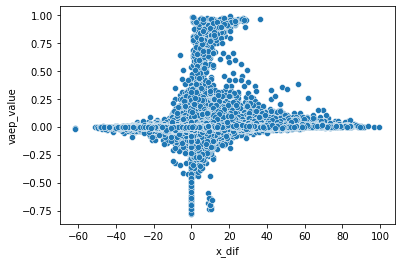

In [59]:
plt.figure()
sns.scatterplot(data=df_actions_zones, x='x_dif', y='vaep_value')
plt.show()

In [ ]:
# plt.figure()
# sns.histplot(data=df_actions_zones, x='x_dif', y='vaep_value')
# plt.show()

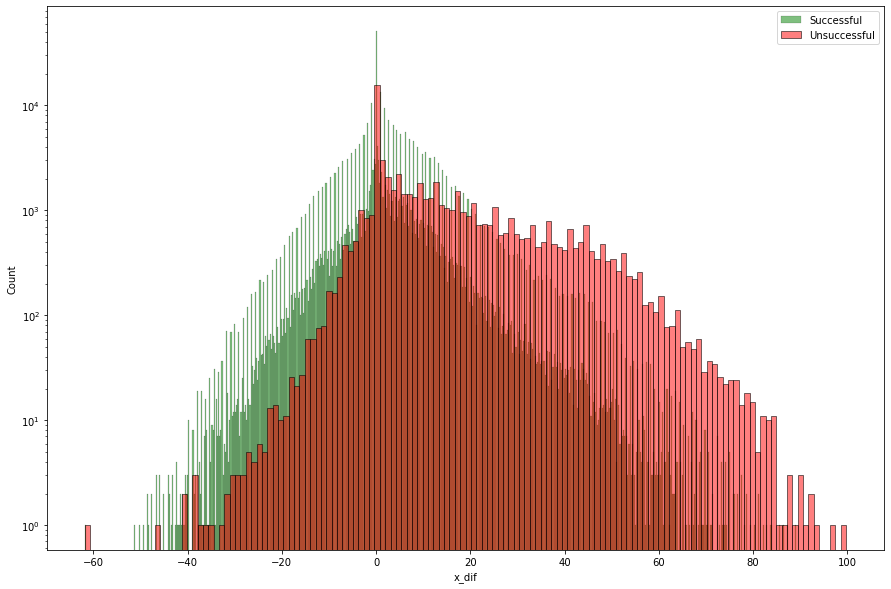

In [60]:
plt.figure(figsize=(15,10))
sns.histplot(df_actions_zones[df_actions_zones['result_name'] == 'success']['x_dif'], alpha=0.5, color='green', label='Successful')
sns.histplot(df_actions_zones[df_actions_zones['result_name'] != 'success']['x_dif'], alpha=0.5, color='red', label = 'Unsuccessful')

plt.yscale('log')
plt.legend()
plt.show()

#### Observations on successful moves and their length and direction

- Successful moves are shorter and backwards with a greater frequency
- Unsuccessful moves tend to be longer and with a forward direction - likely due to the riskier nature of those moves

In [61]:
heatmap_data =df_actions_zones[['end_pitch_zone', 'type_name']].value_counts().reset_index()

In [62]:
heatmap_data.rename(columns={0:'count'}, inplace=True)

In [63]:
heatmap_data = heatmap_data.pivot('end_pitch_zone', 'type_name', 'count')

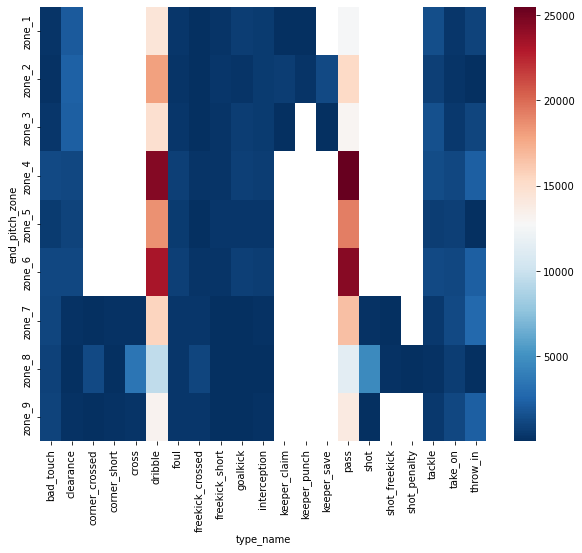

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, cmap='RdBu_r')
plt.show()

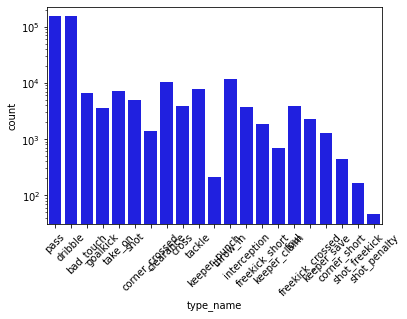

In [65]:
plt.figure()
sns.countplot(df_actions_zones['type_name'], color='blue')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

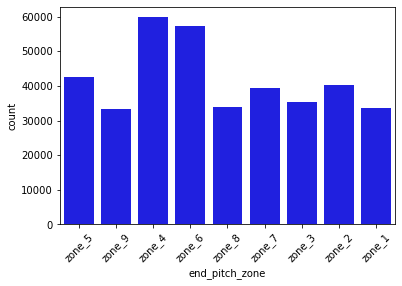

In [66]:
plt.figure()
sns.countplot(df_actions_zones['end_pitch_zone'], color='blue')
plt.xticks(rotation=45)
plt.show()

#### Observations on end zone and action type

- Passes and Dribbles are the most important moves in moving the ball about 
- Will focus the analysis on those 

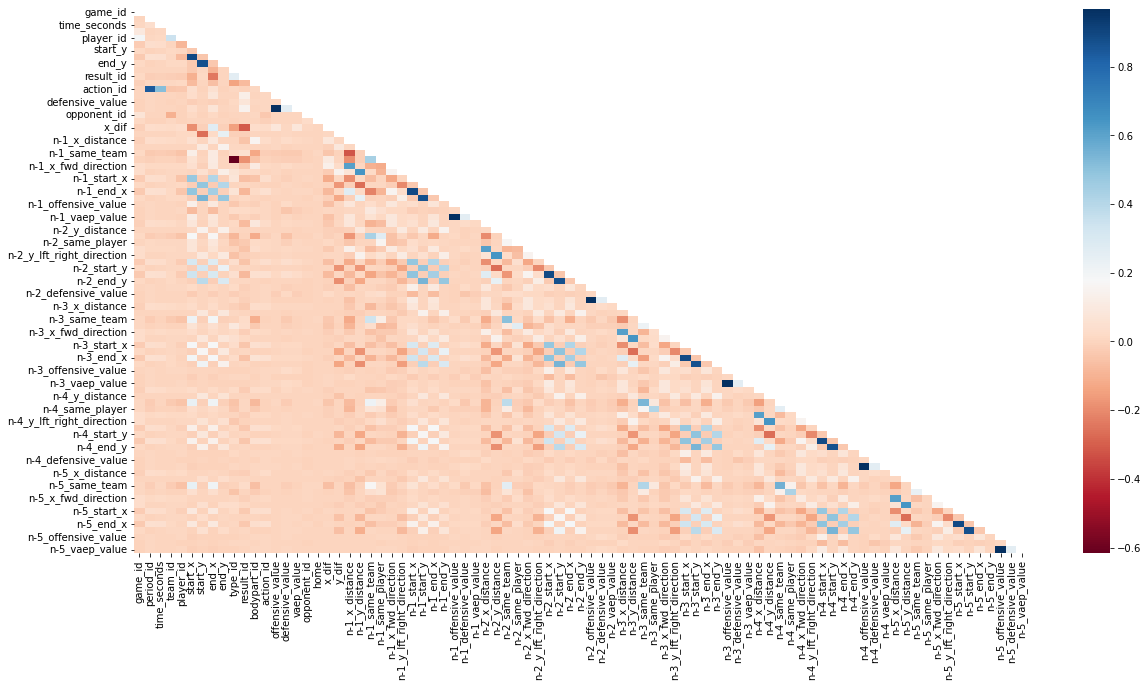

In [67]:
# find the correlation between the variables
corr = df_actions_zones.corr()

# plot the correlation matrix using a heatmap
plt.figure(figsize=(20,10))
matrix = np.triu(corr)
sns.heatmap(corr, mask=matrix, cmap='RdBu')
plt.show()

## Creating Test Set

In [93]:
## Creating test set

VAEP_model = VAEP(nb_prev_actions=5)

# compute features and labels for each game
all_features_test, all_labels_test, all_actions_test = [], [], []
for game_id, game in tqdm(list(df_games_test.iterrows())):
    # load the game's events
    game_events = SBL.events(game_id)
    
    # convert the events to actions
    game_home_team_id = df_games_test.at[game_id, "home_team_id"]
    game_actions = spadl.statsbomb.convert_to_actions(game_events, game_home_team_id)
    game_actions = socceraction.spadl.add_names(game_actions)
    
    # compute features and labels
    all_actions_test.append(game_actions)
    all_features_test.append(VAEP_model.compute_features(game, game_actions))
    all_labels_test.append(VAEP_model.compute_labels(game, game_actions))

# combine all features and labels in a single dataframe
all_actions_test = pd.concat(all_actions_test)
all_features_test = pd.concat(all_features_test)
all_labels_test = pd.concat(all_labels_test)

# fit the model
VAEP_model.fit(all_features_test, all_labels_test)

VAEP_ratings_test = []
for game_id, game in tqdm(list(df_games_test.iterrows())):
    df_events = SBL.events(game_id)
    home_team_id = df_games_test.at[game_id, "home_team_id"]
    df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id)
    ratings = VAEP_model.rate(df_games_test.loc[game_id],df_actions)
    VAEP_ratings_test.append(ratings)
VAEP_ratings_test = pd.concat(VAEP_ratings_test)
rated_df_test = pd.concat([all_actions_test, VAEP_ratings_test], axis=1)

# Converting to left to right play
matches = []
for game_id, game in df_games_test.iterrows():
  
    # convert play left to right
    game_home_team_id = df_games_test.at[game_id, "home_team_id"]
    matches.append(spadl.play_left_to_right(rated_df_test[rated_df_test['game_id'] == game_id], home_team_id=game_home_team_id))

df_actions_zones_test = pd.concat(matches)

# Get players in test set
players_test = []
for game_id, game in tqdm(list(df_games_test.iterrows())):
    
    # load the games players
    players_test.append(SBL.players(game_id))


players_test = pd.concat(players_test, ignore_index=True)


#Create start and end zones
zones = []
end_zones = []

for i, row in df_actions_zones_test.iterrows():
    if ((row['start_x'] >=0) & (row['start_x'] < 35)) & ((row['start_y']>=0) & (row['start_y'] < 23)):
        zones.append('zone_1')
    elif ((row['start_x'] >=0) & (row['start_x'] < 35)) & ((row['start_y']>=23) & (row['start_y'] < 46)):
        zones.append('zone_2')
    elif ((row['start_x'] >=0) & (row['start_x'] < 35)) & ((row['start_y']>=46) & (row['start_y'] <= 69)):
        zones.append('zone_3')
    elif ((row['start_x'] >=35) & (row['start_x'] < 70)) & ((row['start_y']>=0) & (row['start_y'] < 23)):
        zones.append('zone_4')
    elif ((row['start_x'] >=35) & (row['start_x'] < 70)) & ((row['start_y']>=23) & (row['start_y'] < 46)):
        zones.append('zone_5')
    elif ((row['start_x'] >=35) & (row['start_x'] < 70)) & ((row['start_y']>=46) & (row['start_y'] <= 69)):
        zones.append('zone_6')
    elif ((row['start_x'] >=70) & (row['start_x'] <= 105)) & ((row['start_y']>=0) & (row['start_y'] < 23)):
        zones.append('zone_7')
    elif ((row['start_x'] >=70) & (row['start_x'] <= 105)) & ((row['start_y']>=23) & (row['start_y'] < 46)):
        zones.append('zone_8')
    elif ((row['start_x'] >=70) & (row['start_x'] <= 105)) & ((row['start_y']>=46) & (row['start_y'] <= 69)):
        zones.append('zone_9')
    else:
        zones.append('no_zone')

for i, row in df_actions_zones_test.iterrows():
    if ((row['end_x'] >=0) & (row['end_x'] < 35)) & ((row['end_y']>=0) & (row['end_y'] < 23)):
        end_zones.append('zone_1')
    elif ((row['end_x'] >=0) & (row['end_x'] < 35)) & ((row['end_y']>=23) & (row['end_y'] < 46)):
        end_zones.append('zone_2')
    elif ((row['end_x'] >=0) & (row['end_x'] < 35)) & ((row['end_y']>=46) & (row['end_y'] <= 69)):
        end_zones.append('zone_3')
    elif ((row['end_x'] >=35) & (row['end_x'] < 70)) & ((row['end_y']>=0) & (row['end_y'] < 23)):
        end_zones.append('zone_4')
    elif ((row['end_x'] >=35) & (row['end_x'] < 70)) & ((row['end_y']>=23) & (row['end_y'] < 46)):
        end_zones.append('zone_5')
    elif ((row['end_x'] >=35) & (row['end_x'] < 70)) & ((row['end_y']>=46) & (row['end_y'] <= 69)):
        end_zones.append('zone_6')
    elif ((row['end_x'] >=70) & (row['end_x'] <= 105)) & ((row['end_y']>=0) & (row['end_y'] < 23)):
        end_zones.append('zone_7')
    elif ((row['end_x'] >=70) & (row['end_x'] <= 105)) & ((row['end_y']>=23) & (row['end_y'] < 46)):
        end_zones.append('zone_8')
    elif ((row['end_x'] >=70) & (row['end_x'] <= 105)) & ((row['end_y']>=46) & (row['end_y'] <= 69)):
        end_zones.append('zone_9')
    else:
        end_zones.append('no_zone')

df_actions_zones_test['end_pitch_zone'] = end_zones
df_actions_zones_test['start_pitch_zone'] = zones

# opposition 
matches = list(df_actions_zones_test['game_id'].unique())
match_teams = {match: list(df_actions_zones_test[df_actions_zones_test['game_id'] == match]['team_id'].unique()) for match in matches}

df_actions_zones_test['opponent_id'] = [match_teams[k][1] if match_teams[k][0] == row['team_id'] else match_teams[k][0] \
     for i, row in df_actions_zones_test.iterrows() \
        for k, v in match_teams.items() \
            if row['game_id'] == k]

# update action type to pass/dribble/other to deal with class imbalance
df_actions_zones_test['type_name_encoded'] = ['pass' if x =='pass' else\
     ('dribble' if x =='dribble' else 'other')\
         for x in df_actions_zones_test['type_name']]

# Home or Away
df_actions_zones_test['home'] = [1 if np.array(df_games_test[df_games_test.index == row['game_id']]['home_team_id'] == row['team_id'])[0] \
    else 0 for i, row in df_actions_zones_test.iterrows() \
        for match in matches if row['game_id'] == match]

# x and y distance traveled 
df_actions_zones_test['x_dif'] = (df_actions_zones_test['end_x'] - df_actions_zones_test['start_x'])
df_actions_zones_test['y_dif'] = (df_actions_zones_test['end_y'] - df_actions_zones_test['start_y'])

#prior moves
print('Starting prior moves block')
for n in range(1,6):
    df_actions_zones_test[f'n-{n}_x_distance'] = df_actions_zones_test.groupby('game_id').shift(n)[['x_dif']]
    df_actions_zones_test[f'n-{n}_y_distance'] = df_actions_zones_test.groupby('game_id').shift(n)[['y_dif']]
    df_actions_zones_test[f'n-{n}_same_team'] = df_actions_zones_test.team_id.eq(df_actions_zones_test.team_id.shift(n))
    df_actions_zones_test[f'n-{n}_same_player'] = df_actions_zones_test.player_id.eq(df_actions_zones_test.player_id.shift(n))
    df_actions_zones_test[f'n-{n}_x_fwd_direction'] = [1 if row['x_dif'] > 0 else 0 for i, row in df_actions_zones_test.groupby('game_id').shift(n).iterrows()]
    df_actions_zones_test[f'n-{n}_y_lft_right_direction'] = [1 if row['y_dif'] > 0 else 0 for i, row in df_actions_zones_test.groupby('game_id').shift(n).iterrows()]
    df_actions_zones_test[f'n-{n}_start_pitch_zone'] = df_actions_zones_test.groupby('game_id').shift(n)[['start_pitch_zone']]
    df_actions_zones_test[f'n-{n}_end_pitch_zone'] = df_actions_zones_test.groupby('game_id').shift(n)[['end_pitch_zone']]
    df_actions_zones_test[f'n-{n}_start_x'] = df_actions_zones_test.groupby('game_id').shift(n)[['start_x']]
    df_actions_zones_test[f'n-{n}_start_y'] = df_actions_zones_test.groupby('game_id').shift(n)[['start_y']]
    df_actions_zones_test[f'n-{n}_end_x'] = df_actions_zones_test.groupby('game_id').shift(n)[['end_x']]
    df_actions_zones_test[f'n-{n}_end_y'] = df_actions_zones_test.groupby('game_id').shift(n)[['end_y']]
    df_actions_zones_test[f'n-{n}_type_name'] = df_actions_zones_test.groupby('game_id').shift(n)[['type_name']]
    df_actions_zones_test[f'n-{n}_type_name_encoded'] = df_actions_zones_test.groupby('game_id').shift(n)[['type_name_encoded']]
    df_actions_zones_test[f'n-{n}_result_name'] = df_actions_zones_test.groupby('game_id').shift(n)[['result_name']]
    df_actions_zones_test[f'n-{n}_bodypart_name'] = df_actions_zones_test.groupby('game_id').shift(n)[['bodypart_name']]
    df_actions_zones_test[f'n-{n}_offensive_value'] = df_actions_zones_test.groupby('game_id').shift(n)[['offensive_value']]
    df_actions_zones_test[f'n-{n}_defensive_value'] = df_actions_zones_test.groupby('game_id').shift(n)[['defensive_value']]
    df_actions_zones_test[f'n-{n}_vaep_value'] = df_actions_zones_test.groupby('game_id').shift(n)[['vaep_value']]

100%|██████████| 131/131 [03:08<00:00,  1.44s/it]


[0]	validation_0-auc:0.76087
[1]	validation_0-auc:0.76898
[2]	validation_0-auc:0.77567
[3]	validation_0-auc:0.77569
[4]	validation_0-auc:0.79307
[5]	validation_0-auc:0.80636
[6]	validation_0-auc:0.80438
[7]	validation_0-auc:0.80755
[8]	validation_0-auc:0.81107
[9]	validation_0-auc:0.81487
[10]	validation_0-auc:0.81542
[11]	validation_0-auc:0.81577
[12]	validation_0-auc:0.81681
[13]	validation_0-auc:0.81695
[14]	validation_0-auc:0.81857
[15]	validation_0-auc:0.82082
[16]	validation_0-auc:0.82209
[17]	validation_0-auc:0.82063
[18]	validation_0-auc:0.82251
[19]	validation_0-auc:0.82558
[20]	validation_0-auc:0.82690
[21]	validation_0-auc:0.82763
[22]	validation_0-auc:0.82926
[23]	validation_0-auc:0.83067
[24]	validation_0-auc:0.83054
[25]	validation_0-auc:0.83234
[26]	validation_0-auc:0.83274
[27]	validation_0-auc:0.83358
[28]	validation_0-auc:0.83530
[29]	validation_0-auc:0.83608
[30]	validation_0-auc:0.83705
[31]	validation_0-auc:0.83720
[32]	validation_0-auc:0.83725
[33]	validation_0-au

100%|██████████| 131/131 [01:09<00:00,  1.87it/s]


Starting prior moves block


In [94]:
df_actions_zones_test.head()

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id,type_name,result_name,bodypart_name,offensive_value,defensive_value,vaep_value,end_pitch_zone,start_pitch_zone,opponent_id,type_name_encoded,home,x_dif,y_dif,n-1_x_distance,n-1_y_distance,n-1_same_team,n-1_same_player,n-1_x_fwd_direction,n-1_y_lft_right_direction,n-1_start_pitch_zone,n-1_end_pitch_zone,n-1_start_x,n-1_start_y,n-1_end_x,n-1_end_y,n-1_type_name,n-1_type_name_encoded,n-1_result_name,n-1_bodypart_name,n-1_offensive_value,n-1_defensive_value,n-1_vaep_value,n-2_x_distance,n-2_y_distance,n-2_same_team,n-2_same_player,n-2_x_fwd_direction,n-2_y_lft_right_direction,n-2_start_pitch_zone,n-2_end_pitch_zone,n-2_start_x,n-2_start_y,n-2_end_x,n-2_end_y,n-2_type_name,n-2_type_name_encoded,n-2_result_name,n-2_bodypart_name,n-2_offensive_value,n-2_defensive_value,n-2_vaep_value,n-3_x_distance,n-3_y_distance,n-3_same_team,n-3_same_player,n-3_x_fwd_direction,n-3_y_lft_right_direction,n-3_start_pitch_zone,n-3_end_pitch_zone,n-3_start_x,n-3_start_y,n-3_end_x,n-3_end_y,n-3_type_name,n-3_type_name_encoded,n-3_result_name,n-3_bodypart_name,n-3_offensive_value,n-3_defensive_value,n-3_vaep_value,n-4_x_distance,n-4_y_distance,n-4_same_team,n-4_same_player,n-4_x_fwd_direction,n-4_y_lft_right_direction,n-4_start_pitch_zone,n-4_end_pitch_zone,n-4_start_x,n-4_start_y,n-4_end_x,n-4_end_y,n-4_type_name,n-4_type_name_encoded,n-4_result_name,n-4_bodypart_name,n-4_offensive_value,n-4_defensive_value,n-4_vaep_value,n-5_x_distance,n-5_y_distance,n-5_same_team,n-5_same_player,n-5_x_fwd_direction,n-5_y_lft_right_direction,n-5_start_pitch_zone,n-5_end_pitch_zone,n-5_start_x,n-5_start_y,n-5_end_x,n-5_end_y,n-5_type_name,n-5_type_name_encoded,n-5_result_name,n-5_bodypart_name,n-5_offensive_value,n-5_defensive_value,n-5_vaep_value
0,3775648,d062f895-1e3c-4fff-9937-fa3c81408bf7,1,0.0,968,15623.0,52.941176,34.344304,53.823529,32.450633,0,1,0,0,pass,success,foot,0.000000,-0.000000,0.000000,zone_5,zone_5,2647,pass,0,0.882353,-1.893671,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3775648,0cb83915-5393-49da-9ade-106c9ef6a51e,1,0.0,968,15619.0,53.823529,32.450633,51.441176,33.741772,21,1,0,1,dribble,success,foot,0.000008,-0.000047,-0.000038,zone_5,zone_5,2647,dribble,0,-2.382353,1.291139,0.882353,-1.893671,True,False,1,0,zone_5,zone_5,52.941176,34.344304,53.823529,32.450633,pass,pass,success,foot,0.000000,-0.000000,0.000000,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3775648,edd39d4f-cbcf-428d-a6f6-80914c176414,1,0.0,968,15619.0,51.441176,33.741772,36.176471,34.516456,0,1,0,2,pass,success,foot,-0.000113,0.000006,-0.000107,zone_5,zone_5,2647,pass,0,-15.264706,0.774684,-2.382353,1.291139,True,True,0,1,zone_5,zone_5,53.823529,32.450633,51.441176,33.741772,dribble,dribble,success,foot,0.000008,-0.000047,-0.000038,0.882353,-1.893671,True,False,1,0,zone_5,zone_5,52.941176,34.344304,53.823529,32.450633,pass,pass,success,foot,0.000000,-0.000000,0.000000,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3775648,a281156d-530b-4cd5-90a7-e40004b135c3,1,1.0,968,10405.0,36.176471,34.516456,36.970588,33.483544,21,1,0,3,dribble,success,foot,-0.000065,-0.000138,-0.000202,zone_5,zo

## Clustering players

In [68]:
clustering_df = df_actions_zones.groupby(['player_id','start_pitch_zone'])['start_x','start_y'].mean().reset_index()

clustering_df['frequency'] = df_actions_zones.groupby(['player_id', 'start_pitch_zone'])[['start_pitch_zone']].value_counts().values

In [ ]:
clustering_df.head()

,player_id,start_pitch_zone,start_x,start_y,frequency
0,4633.0,zone_1,22.525882,16.078987,75
1,4633.0,zone_2,22.263363,38.728213,635
2,4633.0,zone_3,22.498169,54.164551,1349
3,4633.0,zone_4,48.187500,17.367018,72
4,4633.0,zone_5,47.773566,38.150974,717


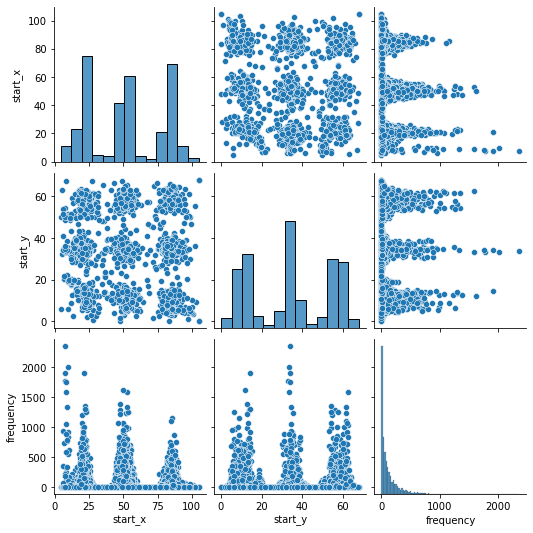

In [95]:
sns.pairplot(clustering_df[['start_pitch_zone', 'start_x', 'start_y','frequency']])
plt.show()

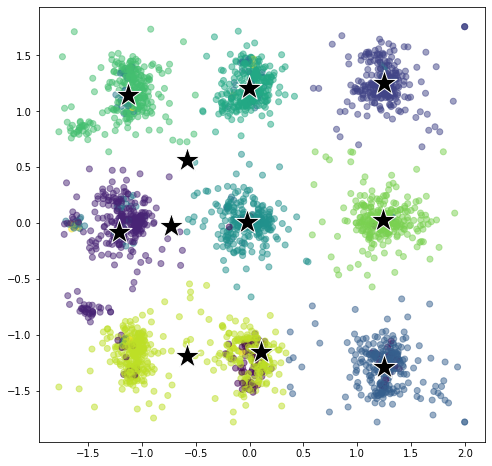

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = clustering_df[['start_x','start_y', 'frequency']]

ss = StandardScaler()
X = ss.fit_transform(X)

# Instantiate
k_means_model_2= KMeans(n_clusters=11)

# Fit
k_means_model_2.fit(X)
cluster_labels = k_means_model_2.predict(X)
centers = k_means_model_2.cluster_centers_

plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], c=cluster_labels, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], 
            c='black', marker="*", edgecolor="white", s=700)
plt.show()

In [97]:
clustering_df['cluster_labels'] = cluster_labels

In [99]:
# Tools
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# We will explore different values for k, and look at the scree plot ('elbow method') 
# using inertia. We will also look at the silhouette score

ks = np.arange(2, 99)
inertia_list = []
silhouette_score_list = []

for k in ks:

    # Instantiate
    my_kmeans = KMeans(n_clusters=k)
    
    # Fit (i.e. get clusters)
    y_labels = my_kmeans.fit_predict(X)
    
    # Append inertia
    inertia_list.append(my_kmeans.inertia_)

    # Append silhouette
    silhouette = silhouette_score(X, y_labels)
    silhouette_score_list.append(silhouette)

In [100]:
np.argmax(silhouette_score_list)
np.arange(2,88)[13]

15

In [101]:
# inertias = pd.Series(inertia_list)
# abs(inertias.pct_change().sort_values(ascending=True))

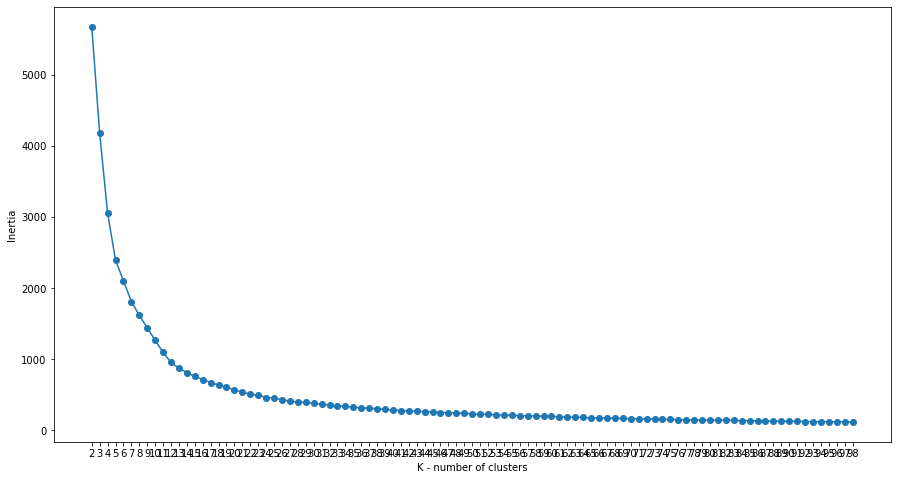

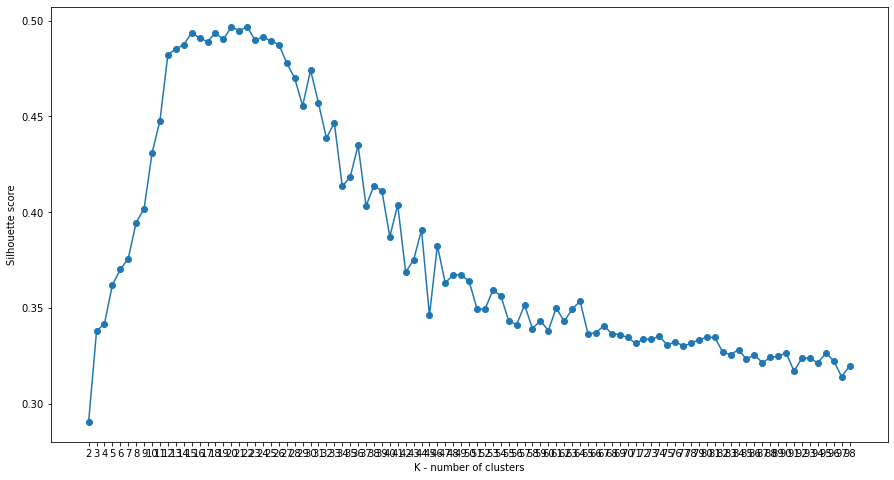

In [102]:
plt.figure(figsize=(15,8))

plt.plot(ks, inertia_list, marker='o')
plt.xlabel('K - number of clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

plt.figure(figsize=(15,8))

plt.plot(ks, silhouette_score_list, marker='o')
plt.xlabel('K - number of clusters')
plt.ylabel('Silhouette score')
plt.xticks(ks)

plt.show()

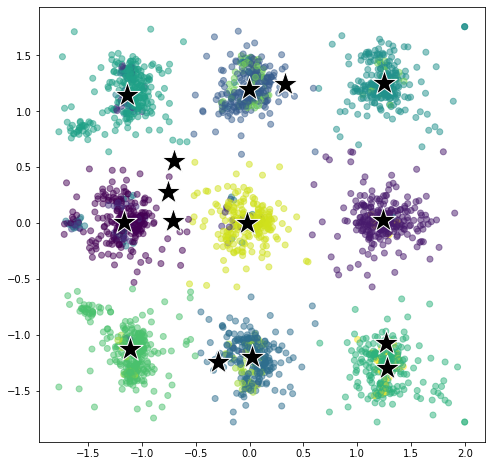

In [103]:
# Instantiate
k_means_model_2= KMeans(n_clusters=15)

# Fit
k_means_model_2.fit(X)
cluster_labels = k_means_model_2.predict(X)
centers = k_means_model_2.cluster_centers_

plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], c=cluster_labels, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], 
            c='black', marker="*", edgecolor="white", s=700)
plt.show()

In [104]:
X_with_labels = pd.DataFrame(X)
X_with_labels['labels'] = cluster_labels

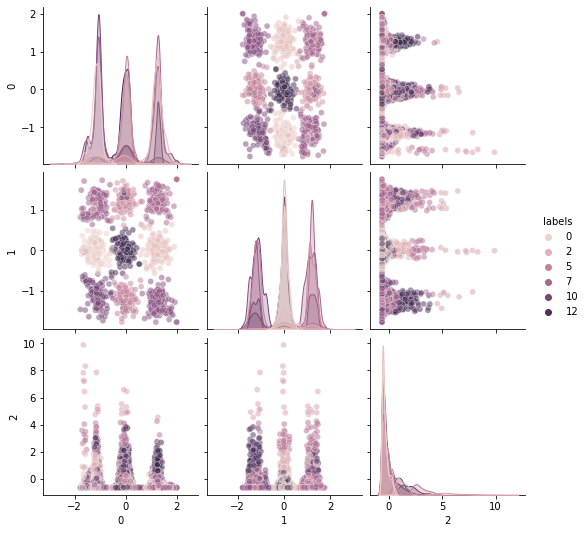

In [105]:
sns.pairplot(X_with_labels, hue='labels', plot_kws={'alpha': 0.5})
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

silhouette_scores = []
num_clusters = []
epsilons = np.arange(0.1, 1.2, 0.1)

for eps in epsilons:

    # Instantiate
    model = DBSCAN(eps=eps, min_samples=5)

    # Fit
    y_labels = model.fit_predict(X)
    
    # we disregard the noise label -1
    n_clusters = len(np.unique(y_labels[y_labels != -1]))
    print(f'eps = {eps} --- n_clusters: {n_clusters}')
    
    silhouette = silhouette_score(X, y_labels)
    silhouette_scores.append(silhouette)
    num_clusters.append(n_clusters)

eps = 0.1 --- n_clusters: 54
eps = 0.2 --- n_clusters: 19
eps = 0.30000000000000004 --- n_clusters: 4
eps = 0.4 --- n_clusters: 5
eps = 0.5 --- n_clusters: 3
eps = 0.6 --- n_clusters: 1
eps = 0.7000000000000001 --- n_clusters: 1
eps = 0.8 --- n_clusters: 1
eps = 0.9 --- n_clusters: 1
eps = 1.0 --- n_clusters: 1
eps = 1.1 --- n_clusters: 2


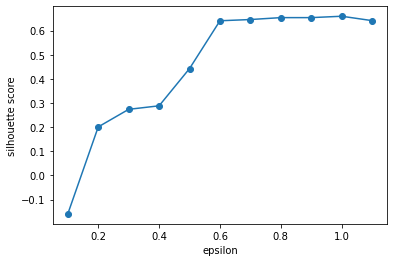

In [ ]:
plt.figure()
plt.plot(epsilons, 
         silhouette_scores, 
         marker='o')
plt.xlabel('epsilon')
plt.ylabel('silhouette score')
plt.show()

## Feature Selection, Encoding and Pre-processing 

- Check class balances 
- Deal with imbalances 
- Encode categorical columns - we can do column transformations as part of GridSearch
- Split into Test and Train
- Scale Data


### TO DO: 

Person correlations for: 
- end_pitch_zone
- action_type
- xT
- VAEP

Need to one hot encode the categories

In [520]:
# from scipy import stats
# data = []
# num_col = df_actions_zones.select_dtypes(include=[np.number])

# for column in num_col.corr().columns:
#     data.append(stats.pearsonr(df_actions_zones['end_pitch_zone'], df_actions_zones[column]))

# end_zone_corr = pd.DataFrame(data, index=df_actions_zones.corr().columns, columns=['Correlation', 'P_value'])

# end_zone_corr.style.background_gradient(cmap='Oranges')

In [ ]:
# from scipy import stats 
# data = []
# for column in corr:
#     data.append(stats.pearsonr(df_actions_zones['end_x'], df_actions_zones[column]))

# num_col_corr = pd.DataFrame(data, index=corr.columns, columns=['Correlation', 'P_value'])
# num_col_corr.style.background_gradient(cmap='Oranges')

In [206]:
modeling_train_df = df_actions_zones.copy()
modeling_test_df = df_actions_zones_test.copy()

In [157]:
players.groupby('player_id')['minutes_played'].sum().sort_values(ascending=False).head()

player_id
10185    3450
15709    3278
4633     3260
4658     3257
16376    3242
Name: minutes_played, dtype: int64

In [244]:
player_id = 4658

In [245]:
player_train_set = modeling_train_df[
    (modeling_train_df['player_id']==player_id)
    & (modeling_train_df['n-5_same_player']!=True)
    & (modeling_train_df['n-4_same_player']!=True)
    & (modeling_train_df['n-3_same_player']!=True)
    & (modeling_train_df['n-2_same_player']!=True)
    & (modeling_train_df['n-1_same_player']!=True)
    ]
player_train_set.shape

(2021, 122)

In [246]:
player_test_set = modeling_test_df[
    (modeling_test_df['player_id']==player_id)
    & (modeling_test_df['n-5_same_player']!=True)
    & (modeling_test_df['n-4_same_player']!=True)
    & (modeling_test_df['n-3_same_player']!=True)
    & (modeling_test_df['n-2_same_player']!=True)
    & (modeling_test_df['n-1_same_player']!=True)
    ]
player_test_set.shape

(1230, 122)

In [247]:
player_train_set.dropna(inplace=True)
player_train_set.shape

(1941, 122)

In [248]:
player_test_set.dropna(inplace=True)
player_test_set.shape

(1178, 122)

In [249]:
X_train = player_train_set.drop(columns=['type_name_encoded', 'end_pitch_zone'])
y_train_type = player_train_set['type_name_encoded']
y_train_end_zone = player_train_set['end_pitch_zone']

X_test = player_test_set.drop(columns=['type_name_encoded', 'end_pitch_zone'])
y_test_type = player_test_set['type_name_encoded']
y_test_end_zone = player_test_set['end_pitch_zone']

In [214]:
X_test.head()

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id,type_name,result_name,bodypart_name,offensive_value,defensive_value,vaep_value,start_pitch_zone,opponent_id,home,x_dif,y_dif,n-1_x_distance,n-1_y_distance,n-1_same_team,n-1_same_player,n-1_x_fwd_direction,n-1_y_lft_right_direction,n-1_start_pitch_zone,n-1_end_pitch_zone,n-1_start_x,n-1_start_y,n-1_end_x,n-1_end_y,n-1_type_name,n-1_type_name_encoded,n-1_result_name,n-1_bodypart_name,n-1_offensive_value,n-1_defensive_value,n-1_vaep_value,n-2_x_distance,n-2_y_distance,n-2_same_team,n-2_same_player,n-2_x_fwd_direction,n-2_y_lft_right_direction,n-2_start_pitch_zone,n-2_end_pitch_zone,n-2_start_x,n-2_start_y,n-2_end_x,n-2_end_y,n-2_type_name,n-2_type_name_encoded,n-2_result_name,n-2_bodypart_name,n-2_offensive_value,n-2_defensive_value,n-2_vaep_value,n-3_x_distance,n-3_y_distance,n-3_same_team,n-3_same_player,n-3_x_fwd_direction,n-3_y_lft_right_direction,n-3_start_pitch_zone,n-3_end_pitch_zone,n-3_start_x,n-3_start_y,n-3_end_x,n-3_end_y,n-3_type_name,n-3_type_name_encoded,n-3_result_name,n-3_bodypart_name,n-3_offensive_value,n-3_defensive_value,n-3_vaep_value,n-4_x_distance,n-4_y_distance,n-4_same_team,n-4_same_player,n-4_x_fwd_direction,n-4_y_lft_right_direction,n-4_start_pitch_zone,n-4_end_pitch_zone,n-4_start_x,n-4_start_y,n-4_end_x,n-4_end_y,n-4_type_name,n-4_type_name_encoded,n-4_result_name,n-4_bodypart_name,n-4_offensive_value,n-4_defensive_value,n-4_vaep_value,n-5_x_distance,n-5_y_distance,n-5_same_team,n-5_same_player,n-5_x_fwd_direction,n-5_y_lft_right_direction,n-5_start_pitch_zone,n-5_end_pitch_zone,n-5_start_x,n-5_start_y,n-5_end_x,n-5_end_y,n-5_type_name,n-5_type_name_encoded,n-5_result_name,n-5_bodypart_name,n-5_offensive_value,n-5_defensive_value,n-5_vaep_value
36,3775624,d7719b7d-4c53-4d6c-b02f-7f09cf228233,1,65.0,746,10185.0,6.970588,16.784810,6.705882,17.301266,21,1,0,36,dribble,success,foot,0.000002,0.001732,0.001734,zone_1,1475,0,-0.264706,0.516456,1.676471,-14.116456,True,False,1,0,zone_2,zone_1,5.294118,30.901266,6.970588,16.784810,goalkick,other,success,foot,0.000169,-0.002530,-0.002361,7.588235,-17.129114,False,False,1,0,zone_9,zone_9,97.235294,64.040506,104.823529,46.911392,pass,pass,fail,foot,-0.001741,-0.000011,-0.001752,17.647059,-0.172152,False,False,1,0,zone_9,zone_9,79.588235,64.212658,97.235294,64.040506,pass,pass,success,foot,0.000442,-0.000012,0.000430,4.323529,-2.237975,False,False,1,0,zone_9,zone_9,75.264706,66.450633,79.588235,64.212658,dribble,dribble,success,foot,0.000802,0.000050,0.000852,0.000000,0.000000,False,False,0,0,zone_9,zone_9,75.264706,66.450633,75.264706,66.450633,take_on,other,success,foot,0.000598,-0.000007,0.000591
57,3775624,393ed79d-321e-47cf-845b-3ea23b56b96a,1,93.0,746,10185.0,39.176471,17.559494,36.794118,45.792405,4,1,0,57,freekick_short,success,foot,0.000482,-0.000767,-0.000285,zone_4,1475,0,-2.382353,28.232911,0.000000,0.000000,False,False,0,0,zone_6,zone_6,64.852941,53.883544,64.852941,53.883544,foul,other,success,foot,-0.000201,0.000464,0.000263,1.676471,12.394937,True,False,1,1,zone_4,zone_4,37.676471,2.496203,39.352941,14.891139,dribble,dribble,success,foot,-0.000090,0.000075,-0.000015,-1.147059,-14.546835,True,False,0,0,zone_4,zone_4,38.823529,17.043038,37.676471,2.496203,pass,pass,success,foot,0.000109,0.000299,0.000407,0.264706,-0.086076,True,False,1,0,zone_4,zone_4,38.558824,17.129114,38.823529,17.043038,dribble,dribble,success,foot,-0.000226,-0.000359,-0.000585,1.323529,-3.701266,True,False,1,0,zone_4,zone_4,37.235294,20.830380,38.558824,17.129114,dribble,dribble,success,foot,0.000508,0.001214,0.001722
70,3775624,c4744706-ac89-4d6b-877c-421d3d0107b7,1,140.0,746,10185.0,5.911765,17.129114,5.823529,17.043038,21,1,0,70,dribble,success,foot,0.001356,0.001921,0.003276,zone_1,1475,0,-0.088235,-0.086076,0.617647,-13.772152,True,False,1,0,zone_2,zone_1,5.294118,30.901266,5.911765,17.129114,goalkick,other,success,foot,0.001047,-0.007421,

In [201]:
numeric_features = [
    'start_x',
    'start_y',
    'time_seconds',
    'n-1_x_distance',
    'n-1_y_distance',
    'n-1_start_x',
    'n-1_start_y',
    'n-1_end_x',
    'n-1_end_y',
    'n-1_offensive_value',
    'n-1_defensive_value',
    'n-1_vaep_value',
    'n-2_x_distance',
    'n-2_y_distance',
    'n-2_start_x',
    'n-2_start_y',
    'n-2_end_x',
    'n-2_end_y',
    'n-2_offensive_value',
    'n-2_defensive_value',
    'n-2_vaep_value',
    'n-3_x_distance',
    'n-3_y_distance',
    'n-3_start_x',
    'n-3_start_y',
    'n-3_end_x',
    'n-3_end_y',
    'n-3_offensive_value',
    'n-3_defensive_value',
    'n-3_vaep_value',
    'n-4_x_distance',
    'n-4_y_distance',
    'n-4_start_x',
    'n-4_start_y',
    'n-4_end_x',
    'n-4_end_y',
    'n-4_offensive_value',
    'n-4_defensive_value',
    'n-4_vaep_value',
    'n-5_x_distance',
    'n-5_y_distance',
    'n-5_start_x',
    'n-5_start_y',
    'n-5_end_x',
    'n-5_end_y',
    'n-5_offensive_value',
    'n-5_defensive_value',
    'n-5_vaep_value',
    ]

categorical_features = [
    'period_id',
    'start_pitch_zone',
    'opponent_id',
    'home',
    'n-1_same_team',
    'n-1_x_fwd_direction',
    'n-1_y_lft_right_direction',
    'n-1_start_pitch_zone',
    'n-1_end_pitch_zone',
    'n-1_type_name_encoded',
    'n-1_result_name',
    'n-1_bodypart_name',
    'n-2_same_team',
    'n-2_x_fwd_direction',
    'n-2_y_lft_right_direction',
    'n-2_start_pitch_zone',
    'n-2_end_pitch_zone',
    'n-2_type_name_encoded',
    'n-2_result_name',
    'n-2_bodypart_name',
    'n-3_same_team',
    'n-3_x_fwd_direction',
    'n-3_y_lft_right_direction',
    'n-3_start_pitch_zone',
    'n-3_end_pitch_zone',
    'n-3_type_name_encoded',
    'n-3_result_name',
    'n-3_bodypart_name',
    'n-4_same_team',
    'n-4_x_fwd_direction',
    'n-4_y_lft_right_direction',
    'n-4_start_pitch_zone',
    'n-4_end_pitch_zone',
    'n-4_type_name_encoded',
    'n-4_result_name',
    'n-4_bodypart_name',
    'n-5_same_team',
    'n-5_x_fwd_direction',
    'n-5_y_lft_right_direction',
    'n-5_start_pitch_zone',
    'n-5_end_pitch_zone',
    'n-5_type_name_encoded',
    'n-5_result_name',
    'n-5_bodypart_name',
    ]

# some of the features below will need dropping before training the model - but are required here for filtering dataset
# passthrough_features = [
#     'game_id',
#     'player_id',
#     ]

drop_features = [
    'original_event_id',
    'team_id',
    'end_x',
    'end_y',
    'type_id',
    'result_id',
    'bodypart_id',
    'action_id',
    'type_name',
    'result_name',
    'bodypart_name',
    'offensive_value',
    'defensive_value',
    'vaep_value',
    'x_dif',
    'y_dif',
    'n-1_same_player',
    'n-2_same_player',
    'n-3_same_player',
    'n-4_same_player',
    'n-5_same_player',
    ]

In [215]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

ct = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('passthrough', passthrough_features),
    ('drop', drop_features))

In [186]:
transformed_train_df = ct.fit_transform(X_train)

In [187]:
column_names = (
    numeric_features 
    + passthrough_features
    + ct.named_transformers_['onehotencoder'].get_feature_names_out().tolist())

In [188]:
transformed_train_df = pd.DataFrame(transformed_train_df, columns=column_names)
transformed_train_df.head()

,start_x,start_y,time_seconds,n-1_x_distance,n-1_y_distance,n-1_start_x,n-1_start_y,n-1_end_x,n-1_end_y,n-1_offensive_value,n-1_defensive_value,n-1_vaep_value,n-2_x_distance,n-2_y_distance,n-2_start_x,n-2_start_y,n-2_end_x,n-2_end_y,n-2_offensive_value,n-2_defensive_value,n-2_vaep_value,n-3_x_distance,n-3_y_distance,n-3_start_x,n-3_start_y,n-3_end_x,n-3_end_y,n-3_offensive_value,n-3_defensive_value,n-3_vaep_value,n-4_x_distance,n-4_y_distance,n-4_start_x,n-4_start_y,n-4_end_x,n-4_end_y,n-4_offensive_value,n-4_defensive_value,n-4_vaep_value,n-5_x_distance,n-5_y_distance,n-5_start_x,n-5_start_y,n-5_end_x,n-5_end_y,n-5_offensive_value,n-5_defensive_value,n-5_vaep_value,game_id,player_id,period_id_1,period_id_2,start_pitch_zone_zone_1,start_pitch_zone_zone_2,start_pitch_zone_zone_3,start_pitch_zone_zone_4,start_pitch_zone_zone_5,start_pitch_zone_zone_6,start_pitch_zone_zone_7,start_pitch_zone_zone_8,start_pitch_zone_zone_9,opponent_id_749,opponent_id_965,opponent_id_966,opponent_id_967,opponent_id_968,opponent_id_969,opponent_id_970,opponent_id_971,opponent_id_972,opponent_id_973,opponent_id_974,opponent_id_1475,home_0,home_1,n-1_same_team_False,n-1_same_team_True,n-1_x_fwd_direction_0,n-1_x_fwd_direction_1,n-1_y_lft_right_direction_0,n-1_y_lft_right_direction_1,n-1_start_pitch_zone_zone_1,n-1_start_pitch_zone_zone_2,n-1_start_pitch_zone_zone_3,n-1_start_pitch_zone_zone_4,n-1_start_pitch_zone_zone_5,n-1_start_pitch_zone_zone_6,n-1_start_pitch_zone_zone_7,n-1_start_pitch_zone_zone_8,n-1_start_pitch_zone_zone_9,n-1_end_pitch_zone_zone_1,n-1_end_pitch_zone_zone_2,n-1_end_pitch_zone_zone_3,n-1_end_pitch_zone_zone_4,n-1_end_pitch_zone_zone_5,n-1_end_pitch_zone_zone_6,n-1_end_pitch_zone_zone_7,n-1_end_pitch_zone_zone_8,n-1_end_pitch_zone_zone_9,n-1_type_name_encoded_dribble,n-1_type_name_encoded_other,n-1_type_name_encoded_pass,n-1_result_name_fail,n-1_result_name_offside,n-1_result_name_success,n-1_result_name_yellow_card,n-1_bodypart_name_foot,n-1_bodypart_name_head,n-1_bodypart_name_other,n-2_same_team_False,n-2_same_team_True,n-2_x_fwd_direction_0,n-2_x_fwd_direction_1,n-2_y_lft_right_direction_0,n-2_y_lft_right_direction_1,n-2_start_pitch_zone_zone_1,n-2_start_pitch_zone_zone_2,n-2_start_pitch_zone_zone_3,n-2_start_pitch_zone_zone_4,n-2_start_pitch_zone_zone_5,n-2_start_pitch_zone_zone_6,n-2_start_pitch_zone_zone_7,n-2_start_pitch_zone_zone_8,n-2_start_pitch_zone_zone_9,n-2_end_pitch_zone_zone_1,n-2_end_pitch_zone_zone_2,n-2_end_pitch_zone_zone_3,n-2_end_pitch_zone_zone_4,n-2_end_pitch_zone_zone_5,n-2_end_pitch_zone_zone_6,n-2_end_pitch_zone_zone_7,n-2_end_pitch_zone_zone_8,n-2_end_pitch_zone_zone_9,n-2_type_name_encoded_dribble,n-2_type_name_encoded_other,n-2_type_name_encoded_pass,n-2_result_name_fail,n-2_result_name_offside,n-2_result_name_success,n-2_result_name_yellow_card,n-2_bodypart_name_foot,n-2_bodypart_name_head,n-2_bodypart_name_other,n-3_same_team_False,n-3_same_team_True,n-3_x_fwd_direction_0,n-3_x_fwd_direction_1,n-3_y_lft_right_direction_0,n-3_y_lft_right_direction_1,n-3_start_pitch_zone_zone_1,n-3_start_pitch_zone_zone_2,n-3_start_pitch_zone_zone_3,n-3_start_pitch_zone_zone_4,n-3_start_pitch_zone_zone_5,n-3_start_pitch_zone_zone_6,n-3_start_pitch_zone_zone_7,n-3_start_pitch_zone_zone_8,n-3_start_pitch_zone_zone_9,n-3_start_pitch_zone_nan,n-3_end_pitch_zone_zone_1,n-3_end_pitch_zone_zone_2,n-3_end_pitch_zone_zone_3,n-3_end_pitch_zone_zone_4,n-3_end_pitch_zone_zone_5,n-3_end_pitch_zone_zone_6,n-3_end_pitch_zone_zone_7,n-3_end_pitch_zone_zone_8,n-3_end_pitch_zone_zone_9,n-3_end_pitch_zone_nan,n-3_type_name_encoded_dribble,n-3_type_name_encoded_other,n-3_type_name_encoded_pass,n-3_type_name_encoded_nan,n-3_result_name_fail,n-3_result_name_offside,n-3_result_name_success,n-3_result_name_yellow_card,n-3_result_name_nan,n-3_bodypart_name_foot,n-3_bodypart_name_head,n-3_bodypart_name_other,n-3_bodypart_name_nan,n-4_same_team_False,n-4_same_team_True,n-4_x_fwd_direction_0,n-4_x_fwd_direction_1,n-4_y_lft_right_direction_0,n-

In [250]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(ct, LogisticRegression())
pipe.fit(X_train, y_train_type)
print(pipe.score(X_train, y_train_type))
print(pipe.score(X_test, y_test_type))

0.7717671303451829
0.7079796264855688


In [251]:
from sklearn import svm

pipe = make_pipeline(ct, svm.SVC())
pipe.fit(X_train, y_train_type)
print(pipe.score(X_train, y_train_type))
print(pipe.score(X_test, y_test_type))

0.7717671303451829
0.7079796264855688


In [252]:
pipe = make_pipeline(ct, LogisticRegression())
pipe.fit(X_train, y_train_end_zone)
print(pipe.score(X_train, y_train_end_zone))
print(pipe.score(X_test, y_test_end_zone))

0.26120556414219476
0.15789473684210525


In [253]:
pipe = make_pipeline(ct, svm.SVC())
pipe.fit(X_train, y_train_end_zone)
print(pipe.score(X_train, y_train_end_zone))
print(pipe.score(X_test, y_test_end_zone))

0.26120556414219476
0.2826825127334465


## Modeling 

**Approach to modeling:**

1. Pick a player to replace in a team
2. Get the top players in their cluster as potential replacements 
3. Fit a model for each of the scouted players 
    - use only that player's data to fit the model
    - the models will predict their next location and the action they take 
    - the parameters in the model should cover the player characteristics and team characteristics. For example, the 5 past moves cover what the team does, and how then the player reacts to those. The player action is the predicted target 

**Model validation and testing approach:**

- Of the scouted players, find those that have undergone a transfer in season 3 in our data set - use season 3 data to test our predictions. 
- Score the model based on the real data from their new team


**Models to train and test:**

- Baseline model for logistic regression for next action and end pitch location
- Random Forest classifier for end pitch location and next action 
- xGBoost classifier for end pitch location and next action 
- Random Forest regressor for end_x and end_y location 
- xGBoost regressor for enx_x and end_y location

## Baseline Model

## Grid Search with Cross-Validation

## Scoring output

**Create a class that:**

1. Takes in a player id 
2. Slices the dataset for this player
3. Clusters most similar players 
4. Take the top 3 players 
5. Slices the datasets for each player
6. Fits a model for each 
7. Run a prediction based on the original player dataset
8. Scores the results 